## Bibliotecas e carregando os dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skt
import datetime as dt
import os
import folium

#sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
#.preprocessing import Imputer
#from sklearn.preprocessing import PolynomialFeatures
#from sklearn.preprocessing import StandardScaler
#from sklearn.feature_selection import VarianceThreshold
#from sklearn.feature_selection import SelectFromModel
#from sklearn.utils import shuffle
#from sklearn.ensemble import RandomForestClassifier


pd.set_option('display.max_columns', 100)

month_num = str(1)
path_to_save = './Tempo-Clima/Analise_dados/'

if not os.path.exists(str(path_to_save+month_num)):
    os.makedirs(str(path_to_save+month_num))
    os.makedirs(str(path_to_save+month_num+'/recovery_data_analise/'))
data = pd.read_csv('./Tempo-Clima/Dados/EMA/Unidos_v2/Brasil_v2/Brasil_'+month_num+'_v4.csv')
#data = data.drop(columns=['Unnamed: 0.1','Unnamed: 0','Unnamed: 0.1.1','Unnamed: 0.1.1.1','Unnamed: 0.1.1.1.1'])

# Qual o tamanho da base?

In [2]:
data.shape

(3240144, 29)

# Retirando duplicações de dados e verificando o tamanho novamente

In [3]:
data.drop_duplicates()
data.shape

(3240144, 29)

# Informações da base

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240144 entries, 0 to 3240143
Data columns (total 29 columns):
Altitude(metros)                              float64
Codigo OMM                                    float64
Day                                           int64
H(UTC)                                        int64
Latitude                                      float64
Longitude                                     float64
Month                                         int64
Nome                                          object
PRECIPITACAO (mm)                             float64
PRESSAO ATMOSFERICA (hPa)                     float64
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              float64
PRESSAO ATMOSFÉRICA MINIMA (hPa)              float64
RADIACAO GLOBAL (KJ/M2)                       float64
TEMPERATURA DO AR (C)                         float64
TEMPERATURA DO PONTO DE ORVALHO (C)           float64
TEMPERATURA MAXIMA (C)                        float64
TEMPERATURA MINIMA (C)        

In [5]:
data.describe().T

count          mean  \
Altitude(metros)                            3240144.0    343.996901   
Codigo OMM                                  3238656.0  85362.868227   
Day                                         3240144.0     16.011555   
H(UTC)                                      3240144.0     11.500000   
Latitude                                    3240144.0    -15.886896   
Longitude                                   3240144.0    -47.767443   
Month                                       3240144.0      1.000000   
PRECIPITACAO (mm)                           2869187.0      0.254088   
PRESSAO ATMOSFERICA (hPa)                   2939329.0    964.766270   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)            2937683.0    965.044651   
PRESSAO ATMOSFÉRICA MINIMA (hPa)            2937683.0    964.479582   
RADIACAO GLOBAL (KJ/M2)                     1603607.0   1505.217077   
TEMPERATURA DO AR (C)                       2952733.0     24.816320   
TEMPERATURA DO PONTO DE ORVALHO (C)         2919355.0     19.699667   
TEMPERATURA MAXIMA (C)                      2952528.0     25.438083   
TEMPERATURA MINIMA (C)                      2952710.0     24.226865   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  2920184.0     20.243729   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  2917137.0     19.177477   
UMIDADE RELATIVA DO AR (%)                  2922729.0     75.837480   
UMIDADE RELATIVA DO MAXIMA AR (%)           2923319.0     78.641364   
UMIDADE RELATIVA DO MINIMA AR (%)           2920822.0     72.847824   
VENTO VELOCIDADE                            2901232.0      2.073040   
VENTO, DIRECAO (graus)                      2880156.0    152.347601   
VENTO, RAJADA MAXIMA (m/s)                  2899269.0      5.034515   
Year                                        3240144.0   2011.672385   

                                                    std           min  \
Altitude(metros)                             287.641994      1.001000   
Codigo OMM                                  2257.005281  81609.000000   
Day                                            8.946065      1.000000   
H(UTC)                                         6.922188      0.000000   
Latitude                                       8.142830    -33.742297   
Longitude                                      6.928796    -72.786778   
Month                                          0.000000      1.000000   
PRECIPITACAO (mm)                              1.681393      0.000000   
PRESSAO ATMOSFERICA (hPa)                     37.716539    812.000000   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              37.726030    812.600000   
PRESSAO ATMOSFÉRICA MINIMA (hPa)              37.709798    811.700000   
RADIACAO GLOBAL (KJ/M2)                     1178.086519      0.000000   
TEMPERATURA DO AR (C)                          4.083133     -4.700000   
TEMPERATURA DO PONTO DE ORVALHO (C)            2.946154    -17.400000   
TEMPERATURA MAXIMA (C)                         4.267074      3.100000   
TEMPERATURA MINIMA (C)                         3.897995     -5.000000   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)     2.887164    -11.100000   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)     3.048641    -17.700000   
UMIDADE RELATIVA DO AR (%)                    17.393255     10.000000   
UMIDADE RELATIVA DO MAXIMA AR (%)             16.317886      1.000000   
UMIDADE RELATIVA DO MINIMA AR (%)             18.353384      1.000000   
VENTO VELOCIDADE                               1.689859      0.000000   
VENTO, DIRECAO (graus)                       105.137128      1.000000   
VENTO, RAJADA MAXIMA (m/s)                     2.980164      0.000000   
Year                                           3.119696   2001.000000   

                                                     25%           50%  \
Altitude(metros)                               75.000000    290.000000   
Codigo OMM                                  81976.000000  86732.000000   
Day                                             8.000000     16.000000   
H(UTC)

# NAO RODAR ISSO AGORA Retirando colunas dados que não seram usados

#data = data.drop(columns = ['PRESSAO ATMOSFERICA (hPa)','PRESSAO ATMOSFÉRICA MAXIMA (hPa)','PRESSAO ATMOSFÉRICA MINIMA (hPa)',
                                   'RADIACAO GLOBAL (KJ/M2)','TEMPERATURA DO PONTO DE ORVALHO (C)',
                                    'VENTO VELOCIDADE ','VENTO, DIRECAO (graus)','VENTO, RAJADA MAXIMA (m/s)','Codigo OMM'
                                   ,'TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)','TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)'])
#data.columns

In [6]:
data.head(5)

Altitude(metros)  Codigo OMM  Day  H(UTC)  Latitude  Longitude  Month  \
0             185.0     81963.0    1       0 -9.358353 -69.926257      1   
1             185.0     81963.0    1       1 -9.358353 -69.926257      1   
2             185.0     81963.0    1       2 -9.358353 -69.926257      1   
3             185.0     81963.0    1       3 -9.358353 -69.926257      1   
4             185.0     81963.0    1       4 -9.358353 -69.926257      1   

                             Nome  PRECIPITACAO (mm)  \
0  Parque Estadual Chandless-A102                0.0   
1  Parque Estadual Chandless-A102                0.0   
2  Parque Estadual Chandless-A102                0.0   
3  Parque Estadual Chandless-A102                0.0   
4  Parque Estadual Chandless-A102                0.0   

   PRESSAO ATMOSFERICA (hPa)  PRESSAO ATMOSFÉRICA MAXIMA (hPa)  \
0                      987.5                             987.5   
1                      988.2                             988.2   
2                      989.0                             989.0   
3                      989.5                             989.5   
4                      989.6                             989.7   

   PRESSAO ATMOSFÉRICA MINIMA (hPa)  RADIACAO GLOBAL (KJ/M2)  \
0                             986.8                      NaN   
1                             987.5                      NaN   
2                             988.2                      NaN   
3                             989.0                      NaN   
4                             989.5                      NaN   

   TEMPERATURA DO AR (C)  TEMPERATURA DO PONTO DE ORVALHO (C)  \
0                   22.3                                 21.5   
1                   22.3                                 21.6   
2                   22.2                                 21.5   
3                   22.1                                 21.4   
4                   22.1                                 21.4   

   TEMPERATURA MAXIMA (C)  TEMPERATURA MINIMA (C)  \
0                    22.7                    22.3   
1                    22.4                    22.2   
2                    22.3                    22.1   
3                    22.2                    22.1   
4                    22.1                    22.1   

   TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  \
0                                        21.9   
1                                        21.7   
2                                        21.6   
3                                        21.5   
4                                        21.5   

   TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  UMIDADE RELATIVA DO AR (%)  \
0                                        21.5                        96.0   
1                                        21.5                        96.0   
2                                        21.4                        96.0   
3                                        21.4                        96.0   
4                                        21.4                        96.0   

   UMIDADE RELATIVA DO MAXIMA AR (%)  UMIDADE RELATIVA DO MINIMA AR (%)  \
0                               96.0                               95.0   
1                               96.0                               96.0   
2                               96.0                               96.0   
3                               96.0                               96.0   
4                               96.0                               96.0   

   VENTO VELOCIDADE   VENTO, DIRECAO (graus)  VENTO, RAJADA MAXIMA (m/s)  \
0                0.0                   234.0                         1.0   
1                0.0                   219.0                         0.9   
2                0.2                    31.0                         1.2   
3                0.1                    22.0                         1.2   
4                0.0                   353.0                         1.1   

   Year                     Cidade Estado Regiao  


In [7]:
data.tail(5)

Altitude(metros)  Codigo OMM  Day  H(UTC)   Latitude  Longitude  \
3240139               6.0     86618.0   31      19 -10.473959 -36.482051   
3240140               6.0     86618.0   31      20 -10.473959 -36.482051   
3240141               6.0     86618.0   31      21 -10.473959 -36.482051   
3240142               6.0     86618.0   31      22 -10.473959 -36.482051   
3240143               6.0     86618.0   31      23 -10.473959 -36.482051   

         Month               Nome  PRECIPITACAO (mm)  \
3240139      1  Brejo Grande-A421                0.0   
3240140      1  Brejo Grande-A421                0.0   
3240141      1  Brejo Grande-A421                0.0   
3240142      1  Brejo Grande-A421                0.0   
3240143      1  Brejo Grande-A421                0.0   

         PRESSAO ATMOSFERICA (hPa)  PRESSAO ATMOSFÉRICA MAXIMA (hPa)  \
3240139                     1012.4                            1012.8   
3240140                     1012.9                            1012.9   
3240141                     1013.5                            1013.6   
3240142                     1014.0                            1014.0   
3240143                     1014.6                            1014.6   

         PRESSAO ATMOSFÉRICA MINIMA (hPa)  RADIACAO GLOBAL (KJ/M2)  \
3240139                            1012.4                 1359.714   
3240140                            1012.4                  976.714   
3240141                            1012.9                  114.162   
3240142                            1013.5                      NaN   
3240143                            1013.9                      NaN   

         TEMPERATURA DO AR (C)  TEMPERATURA DO PONTO DE ORVALHO (C)  \
3240139                   29.4                                 20.9   
3240140                   28.4                                 21.0   
3240141                   27.3                                 21.4   
3240142                   27.1                                 21.5   
3240143                   27.0                                 21.8   

         TEMPERATURA MAXIMA (C)  TEMPERATURA MINIMA (C)  \
3240139                    30.5                    28.4   
3240140                    30.0                    28.4   
3240141                    28.4                    27.2   
3240142                    27.3                    26.9   
3240143                    27.1                    26.8   

         TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  \
3240139                                        21.9   
3240140                                        21.7   
3240141                                        21.5   
3240142                                        21.7   
3240143                                        21.8   

         TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  \
3240139                                        20.5   
3240140                                        20.7   
3240141                                        21.0   
3240142                                        21.4   
3240143                                        21.4   

         UMIDADE RELATIVA DO AR (%)  UMIDADE RELATIVA DO MAXIMA AR (%)  \
3240139                        60.0                               65.0   
3240140                        64.0                               66.0   
3240141                        71.0                               71.0   
3240142                        72.0                               73.0   
3240143                        73.0                               74.0   

         UMIDADE RELATIVA DO MINIMA AR (%)  VENTO VELOCIDADE   \
3240139                               57.0                3.0   
3240140                               59.0                3.4   
3240141                               64.0                1.7   
3240142                               71.0                1.3   
3240143                               71.0                1.1   

         VENTO, DIRECAO (graus)  VENTO, RAJADA MAXIMA (m/s)  Year  \
3240139     

# Temos muitos dados ausentes?

In [8]:
(data.isnull().sum()/len(data))*100

Altitude(metros)                               0.000000
Codigo OMM                                     0.045924
Day                                            0.000000
H(UTC)                                         0.000000
Latitude                                       0.000000
Longitude                                      0.000000
Month                                          0.000000
Nome                                           0.000000
PRECIPITACAO (mm)                             11.448781
PRESSAO ATMOSFERICA (hPa)                      9.284001
PRESSAO ATMOSFÉRICA MAXIMA (hPa)               9.334801
PRESSAO ATMOSFÉRICA MINIMA (hPa)               9.334801
RADIACAO GLOBAL (KJ/M2)                       50.508156
TEMPERATURA DO AR (C)                          8.870316
TEMPERATURA DO PONTO DE ORVALHO (C)            9.900455
TEMPERATURA MAXIMA (C)                         8.876643
TEMPERATURA MINIMA (C)                         8.871025
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)     9

In [9]:
data.dropna().shape

(1487967, 29)

In [10]:
data.shape[0] - data.dropna().shape[0]

1752177

In [11]:
((data<0).sum()/len(data))*100

Altitude(metros)                                0.000000
Codigo OMM                                      0.000000
Day                                             0.000000
H(UTC)                                          0.000000
Latitude                                       99.242256
Longitude                                     100.000000
Month                                           0.000000
Nome                                          100.000000
PRECIPITACAO (mm)                               0.000000
PRESSAO ATMOSFERICA (hPa)                       0.000000
PRESSAO ATMOSFÉRICA MAXIMA (hPa)                0.000000
PRESSAO ATMOSFÉRICA MINIMA (hPa)                0.000000
RADIACAO GLOBAL (KJ/M2)                         0.000000
TEMPERATURA DO AR (C)                           0.000062
TEMPERATURA DO PONTO DE ORVALHO (C)             0.024814
TEMPERATURA MAXIMA (C)                          0.000000
TEMPERATURA MINIMA (C)                          0.000123
TEMPERATURA MÁXIMA DO PONTO DE 

# Quais os valores minimos e maximos?

In [12]:
data.min()

Altitude(metros)                                      1.001
Codigo OMM                                            81609
Day                                                       1
H(UTC)                                                    0
Latitude                                           -33.7423
Longitude                                          -72.7868
Month                                                     1
Nome                                          Abrolhos-A422
PRECIPITACAO (mm)                                         0
PRESSAO ATMOSFERICA (hPa)                               812
PRESSAO ATMOSFÉRICA MAXIMA (hPa)                      812.6
PRESSAO ATMOSFÉRICA MINIMA (hPa)                      811.7
RADIACAO GLOBAL (KJ/M2)                                   0
TEMPERATURA DO AR (C)                                  -4.7
TEMPERATURA DO PONTO DE ORVALHO (C)                   -17.4
TEMPERATURA MAXIMA (C)                                  3.1
TEMPERATURA MINIMA (C)                  

In [13]:
data.max()

Altitude(metros)                                      997
Codigo OMM                                          86998
Day                                                    31
H(UTC)                                                 23
Latitude                                          3.81358
Longitude                                        -34.8156
Month                                                   1
Nome                                          Óbidos-A232
PRECIPITACAO (mm)                                     100
PRESSAO ATMOSFERICA (hPa)                          1043.9
PRESSAO ATMOSFÉRICA MAXIMA (hPa)                   1045.3
PRESSAO ATMOSFÉRICA MINIMA (hPa)                   1042.5
RADIACAO GLOBAL (KJ/M2)                             14515
TEMPERATURA DO AR (C)                                44.9
TEMPERATURA DO PONTO DE ORVALHO (C)                  43.5
TEMPERATURA MAXIMA (C)                               44.9
TEMPERATURA MINIMA (C)                                 45
TEMPERATURA MÁ

# Matriz de correlação dos dados

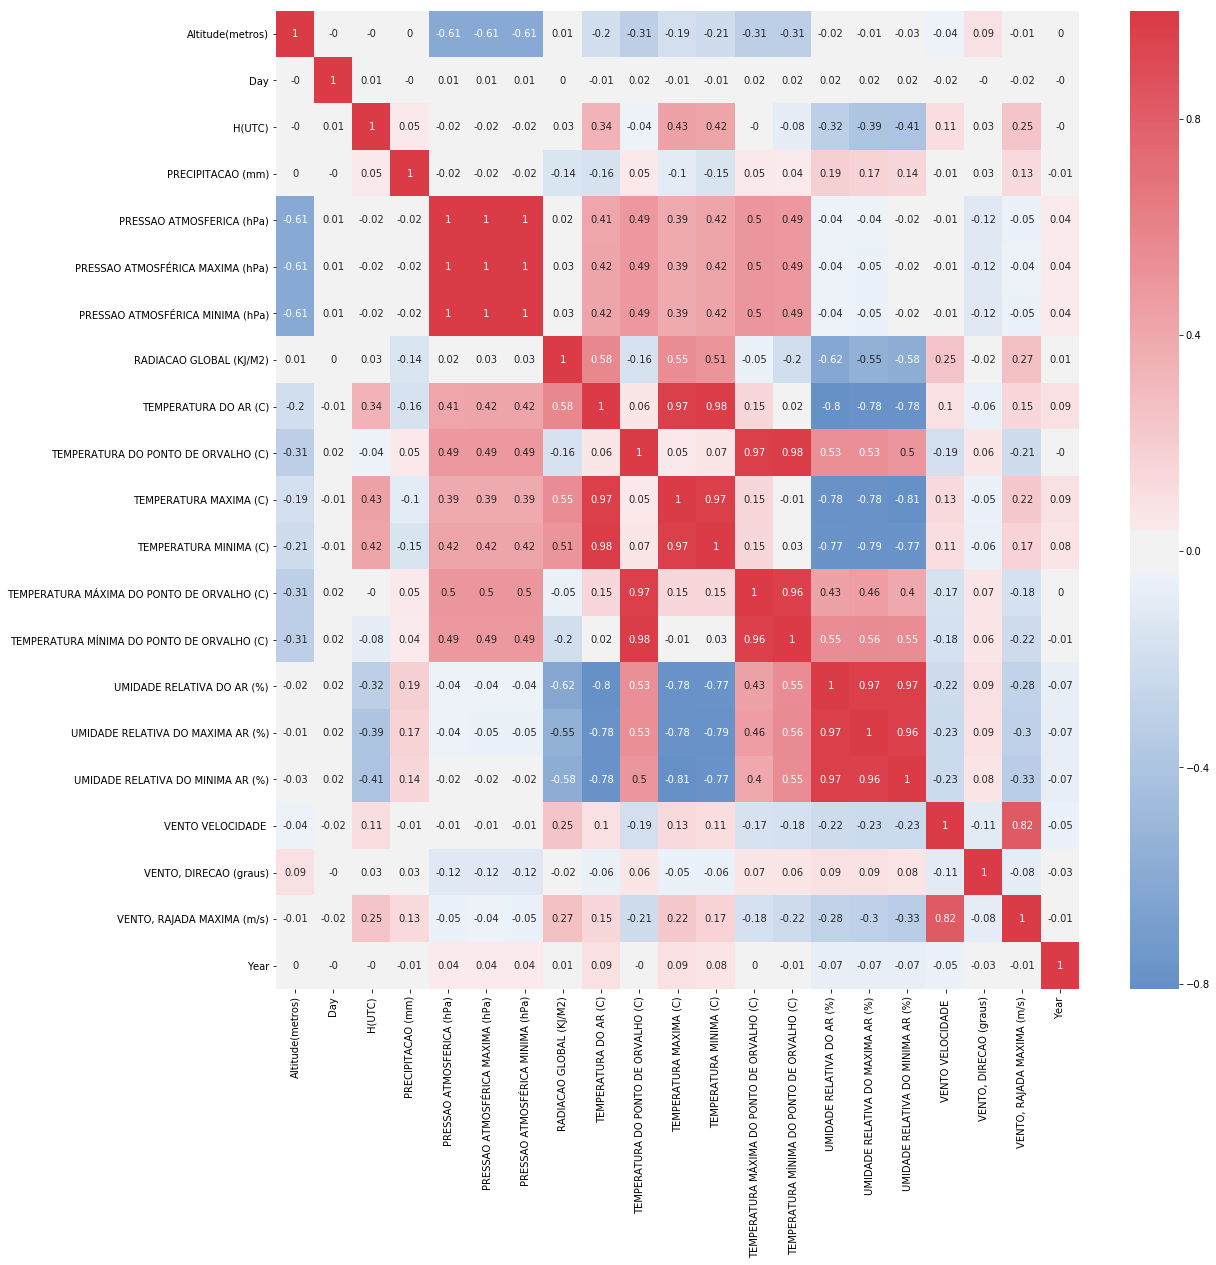

In [14]:
all_columns_num = data.columns.tolist()
all_columns_num.remove('Nome')
all_columns_num.remove('Month')
all_columns_num.remove('Latitude')
all_columns_num.remove('Longitude')
all_columns_num.remove('Codigo OMM')
all_columns_num.remove('Cidade')
all_columns_num.remove('Estado')
all_columns_num.remove('Regiao')
data_clean = data.dropna()
cor_matrix = data_clean[all_columns_num].corr().round(2)
# Plotting heatmap 
fig = plt.figure(figsize=(18,18));
sns.heatmap(cor_matrix, annot=True, center=0, cmap = sns.diverging_palette(250, 10, as_cmap=True), ax=plt.subplot(111));
plt.show()

## Fazendo um mapa para verificar como esta cada estação em relação a dados ausentes e a consistencias dos dados

In [2]:
def make_marker(name,lat,long,alt, temp_min,temp_max, temp_min_min,temp_min_max,
                temp_max_min,temp_max_max, prep_min,prep_max, ur_min,ur_max,
                ur_min_min,ur_min_max, ur_max_min,ur_max_max, miss_data_temp_min,
                miss_data_temp_max, miss_data_prep, miss_data_ur_min, miss_data_ur_max,
                miss_data_ur,color):
    return folium.Marker(location=[df_temp['Latitude'].unique()[0],df_temp['Longitude'].unique()[0]], 
                 popup='''
                 Name: {:s}
                 Latitude:{:f}
                 longitude:{:f}
                 Altitude(metros) : {:f}
                 Minimos e Maximos
                 
                 Temperatura do ar: {:f}\t{:f}
                 Temperatura Minima: {:f}\t{:F}
                 Temperatura Maxima:  {:f}\t{:f}
                 Precipitação: {:f}\t{:f}
                 Umidade Relativa: {:f}\t{:f}
                 UR Minima: {:f}\t{:f}
                 UR Maxima: {:f}\t{:f}
                 
                 Dados Ausentes
                 
                 Temperatura Minima: {:f}
                 Temperatura Maxima: {:f}
                 Precipitação: {:f}
                 UR Minima: {:f}
                 UR Maxima: {:f}
                 UR:{:f}
                 '''.format(name,lat,long,alt,
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur), 
                icon=folium.Icon(color=color))

### Problemas procurados

##### - Temperatura minima              > Temperatura Maxima
##### - Temperatura(min,max,do ar)      < 0 OU Temperatura(min,max,do ar)>45
##### - Temperatura minima do Ponto de Orvalho              > Temperatura Maxima do Ponto de Orvalho
##### - Temperatura do Ponto de Orvalho(min,max,do ar)      < 0 OU Temperatura(min,max,do ar)>45
##### - Umidade Relativa(min,max,do ar) < 0 OU Umidade Relativa(min,max,do ar)   >100
##### - Umidade relativa minima         > Umidade relativa maxima
##### - Dados ausentes > 30

In [3]:
#Grupo de marcadores para possivel problemas
fg_miss_data          =      folium.FeatureGroup(name='Miss Data')
fg_temp_inconsistency =      folium.FeatureGroup(name='Temp correlation Inconsistency')
fg_temp_min           =      folium.FeatureGroup(name='Temp minima Inconsistency')
fg_temp               =      folium.FeatureGroup(name='Temp air Inconsistency')
fg_temp_max           =      folium.FeatureGroup(name='Temp Maxima Inconsistency')
fg_ur_inconsistency   =      folium.FeatureGroup(name='Umildade Relatica Inconsistency')

df_miss_data = pd.DataFrame(columns = ['Estação','Md_temp_max','Md_temp_min','Md_temp','Md_ur_max','Md_ur_min','MD_ur','Md_prec'])

recovery_list = []
danger_list = []
temp_min_list = []
temp_max_list = []
temp_inconsistency_list = []
temp_list = []
ur_list = []

for name in data['Nome'].unique().tolist():
    
    df_temp = data.loc[lambda df: df.Nome == name, :]
    #Maximo e minimos
    temp_min     = df_temp['TEMPERATURA DO AR (C)'].min()
    temp_max     = df_temp['TEMPERATURA DO AR (C)'].max()
    temp_min_min = df_temp['TEMPERATURA MINIMA (C)'].min()
    temp_min_max = df_temp['TEMPERATURA MINIMA (C)'].max()
    temp_max_min = df_temp['TEMPERATURA MAXIMA (C)'].min()
    temp_max_max = df_temp['TEMPERATURA MAXIMA (C)'].max()
    prep_max     = df_temp['PRECIPITACAO (mm)'].max()
    prep_min     = df_temp['PRECIPITACAO (mm)'].min()
    ur_max       = df_temp['UMIDADE RELATIVA DO AR (%)'].max()
    ur_min       = df_temp['UMIDADE RELATIVA DO AR (%)'].min()
    ur_max_max   = df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)'].max()
    ur_max_min   = df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)'].min()
    ur_min_max   = df_temp['UMIDADE RELATIVA DO MINIMA AR (%)'].max()
    ur_min_min   = df_temp['UMIDADE RELATIVA DO MINIMA AR (%)'].min()
    #Dados ausentes
    miss_data_temp     = (df_temp['TEMPERATURA DO AR (C)'].isnull().sum()/
                          len(df_temp['TEMPERATURA DO AR (C)']))*100
    miss_data_temp_min = (df_temp['TEMPERATURA MINIMA (C)'].isnull().sum()/
                          len(df_temp['TEMPERATURA MINIMA (C)']))*100
    miss_data_temp_max = (df_temp['TEMPERATURA MAXIMA (C)'].isnull().sum()/
                          len(df_temp['TEMPERATURA MAXIMA (C)']))*100
    miss_data_prep     = (df_temp['PRECIPITACAO (mm)'].isnull().sum()/
                          len(df_temp['PRECIPITACAO (mm)']))*100
    miss_data_ur_min   = (df_temp['UMIDADE RELATIVA DO MINIMA AR (%)'].isnull().sum()/
                          len(df_temp['UMIDADE RELATIVA DO MINIMA AR (%)']))*100
    miss_data_ur_max   = (df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)'].isnull().sum()/
                          len(df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)']))*100
    miss_data_ur       = (df_temp['UMIDADE RELATIVA DO AR (%)'].isnull().sum()/
                          len(df_temp['UMIDADE RELATIVA DO AR (%)']))*100
    #Estações com 10% a 50% de dados ausentes poderão ser interpolados
    miss_recovery = (miss_data_temp> 10 and miss_data_temp < 30,
                      miss_data_temp_min> 10 and miss_data_temp_min < 30,
                      miss_data_prep > 10 and miss_data_prep< 30,
                      miss_data_temp_max > 10 and miss_data_temp_max < 30,
                      miss_data_ur > 10 and miss_data_ur < 30,
                      miss_data_ur_max > 10 and miss_data_ur_max < 30,
                      miss_data_ur_min > 10 and miss_data_ur_min < 30)
    #Estações com 50% ou mais de dados ausentes poderam ser eliminadas
    miss_danger = (miss_data_temp > 30,miss_data_temp_min> 30,miss_data_prep> 30,
                   miss_data_temp_max> 30,miss_data_ur> 30,
                   miss_data_ur_max> 30,miss_data_ur_min > 30)
    
    df_miss_data = df_miss_data.append(pd.DataFrame([name,miss_data_temp_max,miss_data_temp_min,miss_data_temp,miss_data_ur_max,
              miss_data_ur_min,miss_data_ur,miss_data_prep], index = df_miss_data.columns.tolist()).T)
    if miss_danger == (1,1,1,1,1,1,1):
        color = 'red'
        danger_list.append(name)
    elif True in miss_recovery:
        color = 'purple'
        recovery_list.append(name)
    else:
        color = 'green'
    fg_miss_data.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))
        
    temp_inconsistency = (df_temp['TEMPERATURA MAXIMA (C)'] <= df_temp['TEMPERATURA MINIMA (C)'])
    
    if True in temp_inconsistency:
        color = 'red'
        temp_inconsistency_list.append(name)
    else:
        color = 'green'
    fg_temp_inconsistency.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))
    
    if (temp_max_min < 0) or (temp_max_max > 45):
        color = 'red'
        temp_max_list.append(name)
    else:
        color = 'green'
    fg_temp_max.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))
    
    if (temp_min < 0) or (temp_max > 45):
        color = 'red'
        temp_list.append(name)
    else:
        color = 'green'
    fg_temp_inconsistency.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))
    
    if (temp_min_min < 0) or (temp_min_max > 45):
        color = 'red'
        temp_min_list.append(name)
    else:
        color = 'green'
    
    fg_temp_min.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))
    
    ur_min_danger = (ur_min < 0, ur_max_min < 0, ur_min_min < 0 )
    ur_max_danger = (ur_max >100,ur_max_max>100,ur_min_max>100)
    ur_inconsistency = (df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)'] <= df_temp['UMIDADE RELATIVA DO MINIMA AR (%)'])
   
    if (True in ur_min_danger) or (True in ur_max_danger) or (True in ur_inconsistency):
        color = 'red'
        ur_list.append(name)
    else:
        color = 'green'
    fg_ur_inconsistency.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))

map_miss_data          = folium.Map()
map_temp_inconsistency = folium.Map()
map_temp_min           = folium.Map()
map_temp_max           = folium.Map()
map_ur_inconsistency   = folium.Map()
map_miss_data.add_child(fg_miss_data).save(str(path_to_save+month_num+'/map_'+month_num+'_miss_data.html'))
map_temp_inconsistency.add_child(fg_temp_inconsistency).save(path_to_save+month_num+'/map_'+month_num+'_temp_incosistency.html')
map_temp_min.add_child(fg_temp_min).save(path_to_save+month_num+'/map_'+month_num+'_temp_min.html')
map_temp_max.add_child(fg_temp_max).save(path_to_save+month_num+'/map_'+month_num+'_temp_max.html')
map_ur_inconsistency.add_child(fg_ur_inconsistency).save(path_to_save+month_num+'/map_'+month_num+'_ur_incosistency.html')

df_miss_data = df_miss_data.reset_index(drop=True)
df_miss_data.to_csv(str(path_to_save+month_num+'/'+'Data_miss.csv'))

# Analisando as possiveis incosistencia nos dados 
## Verificando os dados da Umidade relativa

In [4]:
len(ur_list)

1

In [5]:
ur_list

['Parque Estadual Chandless-A102']

In [6]:
df_temp = data.loc[lambda df: df.Nome == 'Parque Estadual Chandless-A102', :].reset_index()
errors = df_temp.loc[df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)']<=df_temp['UMIDADE RELATIVA DO MINIMA AR (%)'],:]['index'].tolist()
data.iloc[errors][['UMIDADE RELATIVA DO MAXIMA AR (%)','UMIDADE RELATIVA DO MINIMA AR (%)','UMIDADE RELATIVA DO AR (%)']].count()

UMIDADE RELATIVA DO MAXIMA AR (%)    1101
UMIDADE RELATIVA DO MINIMA AR (%)    1101
UMIDADE RELATIVA DO AR (%)           1101
dtype: int64

Como podemos ver os dados de umidade estão todos iguais nestes registros, por isso iremos retila-los

In [7]:
for er in errors:
        data.loc[er,'UMIDADE RELATIVA DO MAXIMA AR (%)'] = np.nan
        data.loc[er,'UMIDADE RELATIVA DO MINIMA AR (%)'] = np.nan
        data.loc[er,'UMIDADE RELATIVA DO AR (%)'] = np.nan

## Incosistencia nos dados de temperatura

In [8]:
temp_inconsistency_list

['Parque Estadual Chandless-A102']

### Foi encontrado apenas uma estação com incosistencia de dados de temperatura, vamos ver estes erros

In [9]:
df_temp = data.loc[lambda df: df.Nome == 'Parque Estadual Chandless-A102', :].reset_index()
errors = df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<=df_temp['TEMPERATURA MINIMA (C)'],:]['index'].tolist()
data.iloc[errors].count()

Altitude(metros)                              24
Codigo OMM                                    24
Day                                           24
H(UTC)                                        24
Latitude                                      24
Longitude                                     24
Month                                         24
Nome                                          24
PRECIPITACAO (mm)                             24
PRESSAO ATMOSFERICA (hPa)                     24
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              24
PRESSAO ATMOSFÉRICA MINIMA (hPa)              24
RADIACAO GLOBAL (KJ/M2)                        4
TEMPERATURA DO AR (C)                         24
TEMPERATURA DO PONTO DE ORVALHO (C)           24
TEMPERATURA MAXIMA (C)                        24
TEMPERATURA MINIMA (C)                        24
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)    24
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)    24
UMIDADE RELATIVA DO AR (%)                     6
UMIDADE RELATIVA DO 

#### Apenas uma estação foi encontrada com incosistencia na temperatura, e este problema é por causa que os dados de temperatura estão todos iguais

In [10]:
for er in errors:
        data.loc[er,'TEMPERATURA DO AR (C)'] = np.nan
        data.loc[er,'TEMPERATURA MAXIMA (C)'] = np.nan
        data.loc[er,'TEMPERATURA MINIMA (C)'] = np.nan

## Possiveis erros de temperatura maxima

In [11]:
len(temp_max_list)

0

In [12]:
temp_max_list

[]

In [13]:
map_temp_max

#### Não foi encontrado nem um erro na temperatura maxima

## Possiveis erros de temperatura minima

In [14]:
len(temp_min_list)

4

In [15]:
temp_min_list

['Goiânia-A002',
 'Comodoro-A913',
 'Rio de Janeiro - Marambaia-A602',
 'Bacabal-A220']

In [16]:
map_temp_min

In [17]:
df_temp = data.loc[lambda df: df.Nome == temp_min_list[0], :]
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<5,:]

Altitude(metros)  Codigo OMM  Day  H(UTC)   Latitude  Longitude  \
440208             727.0     86734.0    6       0 -16.642841 -49.220222   
440235             727.0     86734.0    7       3 -16.642841 -49.220222   
440289             727.0     86734.0    9       9 -16.642841 -49.220222   
440431             727.0     86734.0   15       7 -16.642841 -49.220222   
440485             727.0     86734.0   17      13 -16.642841 -49.220222   

        Month          Nome  PRECIPITACAO (mm)  PRESSAO ATMOSFERICA (hPa)  \
440208      1  Goiânia-A002                0.0                      929.9   
440235      1  Goiânia-A002                0.0                      931.4   
440289      1  Goiânia-A002                0.0                      933.7   
440431      1  Goiânia-A002                0.0                      930.7   
440485      1  Goiânia-A002                0.0                      934.0   

        PRESSAO ATMOSFÉRICA MAXIMA (hPa)  PRESSAO ATMOSFÉRICA MINIMA (hPa)  \
440208                             929.9                             929.5   
440235                             931.5                             931.3   
440289                             933.7                             933.2   
440431                             930.8                             930.3   
440485                             934.2                             934.0   

        RADIACAO GLOBAL (KJ/M2)  TEMPERATURA DO AR (C)  \
440208                      NaN                   20.4   
440235                      NaN                   16.7   
440289                      NaN                   -4.7   
440431                      NaN                   21.3   
440485                 1380.611                   22.9   

        TEMPERATURA DO PONTO DE ORVALHO (C)  TEMPERATURA MAXIMA (C)  \
440208                                 13.7                    21.3   
440235                                 14.8                    17.7   
440289                                  NaN                    22.4   
440431                                 19.6                    21.4   
440485                                 20.0                    23.0   

        TEMPERATURA MINIMA (C)  TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  \
440208                     3.3                                        14.1   
440235                     4.8                                        15.1   
440289                    -4.7                                        19.4   
440431                     4.8                                        20.6   
440485                     3.9                                        20.5   

        TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  \
440208                                        -1.0   
440235                                        11.2   
440289                                        -6.5   
440431                                         4.3   
440485                                        14.7   

        UMIDADE RELATIVA DO AR (%)  UMIDADE RELATIVA DO MAXIMA AR (%)  \
440208                        65.0                               70.0   
440235                        89.0                               89.0   
440289                        87.0                               88.0   
440431                        90.0                               95.0   
440485                        84.0                               92.0   

        UMIDADE RELATIVA DO MINIMA AR (%)  VENTO VELOCIDADE   \
440208                               62.0                0.4   
440235                               84.0                0.0   
440289                               83.0                2.2   
440431                               90.0                1.1   
440485                               84.0                3.1   

        VENTO, DIRECAO (graus)  VENTO, RAJADA MAXIMA (m/s)  Year   Cidade  \
440208                   141.0                         2.8  2009  Goiânia   
440235                   311.0                         2.1  2009  Goiânia   


In [18]:
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']>40,:]

Empty DataFrame
Columns: [Altitude(metros), Codigo OMM, Day, H(UTC), Latitude, Longitude, Month, Nome, PRECIPITACAO (mm), PRESSAO ATMOSFERICA (hPa), PRESSAO ATMOSFÉRICA MAXIMA (hPa), PRESSAO ATMOSFÉRICA MINIMA (hPa), RADIACAO GLOBAL (KJ/M2), TEMPERATURA DO AR (C), TEMPERATURA DO PONTO DE ORVALHO (C), TEMPERATURA MAXIMA (C), TEMPERATURA MINIMA (C), TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C), TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C), UMIDADE RELATIVA DO AR (%), UMIDADE RELATIVA DO MAXIMA AR (%), UMIDADE RELATIVA DO MINIMA AR (%), VENTO VELOCIDADE , VENTO, DIRECAO (graus), VENTO, RAJADA MAXIMA (m/s), Year, Cidade, Estado, Regiao]
Index: []

In [19]:
df_temp = data.loc[lambda df: df.Nome == temp_min_list[1], :]
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<5,:]

Altitude(metros)  Codigo OMM  Day  H(UTC)   Latitude  Longitude  \
879214             577.0     86661.0    6      22 -13.708046 -59.762385   
879735             577.0     86661.0   28      15 -13.708046 -59.762385   

        Month           Nome  PRECIPITACAO (mm)  PRESSAO ATMOSFERICA (hPa)  \
879214      1  Comodoro-A913                0.0                      945.6   
879735      1  Comodoro-A913                0.0                      948.3   

        PRESSAO ATMOSFÉRICA MAXIMA (hPa)  PRESSAO ATMOSFÉRICA MINIMA (hPa)  \
879214                             945.6                             945.4   
879735                             948.4                             948.2   

        RADIACAO GLOBAL (KJ/M2)  TEMPERATURA DO AR (C)  \
879214                  543.199                    NaN   
879735                 3281.557                    NaN   

        TEMPERATURA DO PONTO DE ORVALHO (C)  TEMPERATURA MAXIMA (C)  \
879214                                  NaN                     NaN   
879735                                  NaN                     NaN   

        TEMPERATURA MINIMA (C)  TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  \
879214                     3.8                                         NaN   
879735                    -5.0                                         NaN   

        TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  \
879214                                         NaN   
879735                                         NaN   

        UMIDADE RELATIVA DO AR (%)  UMIDADE RELATIVA DO MAXIMA AR (%)  \
879214                         NaN                                NaN   
879735                         NaN                                NaN   

        UMIDADE RELATIVA DO MINIMA AR (%)  VENTO VELOCIDADE   \
879214                                NaN                0.5   
879735                                NaN                2.2   

        VENTO, DIRECAO (graus)  VENTO, RAJADA MAXIMA (m/s)  Year    Cidade  \
879214                   354.0                         6.2  2015  Comodoro   
879735                   313.0                         4.7  2015  Comodoro   

             Estado        Regiao  
879214  Mato Grosso  Centro Oeste  
879735  Mato Grosso  Centro Oeste

In [20]:
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']>40,:]

Empty DataFrame
Columns: [Altitude(metros), Codigo OMM, Day, H(UTC), Latitude, Longitude, Month, Nome, PRECIPITACAO (mm), PRESSAO ATMOSFERICA (hPa), PRESSAO ATMOSFÉRICA MAXIMA (hPa), PRESSAO ATMOSFÉRICA MINIMA (hPa), RADIACAO GLOBAL (KJ/M2), TEMPERATURA DO AR (C), TEMPERATURA DO PONTO DE ORVALHO (C), TEMPERATURA MAXIMA (C), TEMPERATURA MINIMA (C), TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C), TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C), UMIDADE RELATIVA DO AR (%), UMIDADE RELATIVA DO MAXIMA AR (%), UMIDADE RELATIVA DO MINIMA AR (%), VENTO VELOCIDADE , VENTO, DIRECAO (graus), VENTO, RAJADA MAXIMA (m/s), Year, Cidade, Estado, Regiao]
Index: []

In [21]:
df_temp = data.loc[lambda df: df.Nome == temp_min_list[2], :]
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<5,:]

Altitude(metros)  Codigo OMM  Day  H(UTC)   Latitude  Longitude  \
2025601               9.0     86914.0    2       1 -23.050334 -43.595685   
2025688               9.0     86914.0    5      16 -23.050334 -43.595685   
2025689               9.0     86914.0    5      17 -23.050334 -43.595685   
2025711               9.0     86914.0    6      15 -23.050334 -43.595685   
2025756               9.0     86914.0    8      12 -23.050334 -43.595685   

         Month                             Nome  PRECIPITACAO (mm)  \
2025601      1  Rio de Janeiro - Marambaia-A602                3.0   
2025688      1  Rio de Janeiro - Marambaia-A602                0.0   
2025689      1  Rio de Janeiro - Marambaia-A602                0.0   
2025711      1  Rio de Janeiro - Marambaia-A602                0.0   
2025756      1  Rio de Janeiro - Marambaia-A602                0.0   

         PRESSAO ATMOSFERICA (hPa)  PRESSAO ATMOSFÉRICA MAXIMA (hPa)  \
2025601                     1014.8                            1014.8   
2025688                     1014.0                            1014.4   
2025689                     1013.6                            1014.0   
2025711                     1012.9                            1013.8   
2025756                     1010.6                            1010.7   

         PRESSAO ATMOSFÉRICA MINIMA (hPa)  RADIACAO GLOBAL (KJ/M2)  \
2025601                            1014.2                      NaN   
2025688                            1013.9                   2841.0   
2025689                            1013.6                   2436.0   
2025711                            1012.9                   3366.0   
2025756                            1010.5                    990.0   

         TEMPERATURA DO AR (C)  TEMPERATURA DO PONTO DE ORVALHO (C)  \
2025601                   14.7                                 13.1   
2025688                   15.9                                  9.3   
2025689                   16.3                                  9.9   
2025711                   16.1                                  8.6   
2025756                   25.4                                 19.7   

         TEMPERATURA MAXIMA (C)  TEMPERATURA MINIMA (C)  \
2025601                    17.2                     3.2   
2025688                    17.3                     1.3   
2025689                    16.7                    -0.3   
2025711                    18.1                     1.2   
2025756                    26.4                     1.1   

         TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  \
2025601                                        15.5   
2025688                                        11.4   
2025689                                         9.9   
2025711                                        11.2   
2025756                                        20.6   

         TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  \
2025601                                         1.6   
2025688                                        -4.5   
2025689                                        -7.1   
2025711                                        -5.1   
2025756                                        -1.7   

         UMIDADE RELATIVA DO AR (%)  UMIDADE RELATIVA DO MAXIMA AR (%)  \
2025601                        90.0                               90.0   
2025688                        65.0                               69.0   
2025689                        65.0                               66.0   
2025711                        61.0                               64.0   
2025756                         NaN                               82.0   

         UMIDADE RELATIVA DO MINIMA AR (%)  VENTO VELOCIDADE   \
2025601                               90.0                7.6   
2025688                               63.0                5.8   
2025689                               59.0                5.6   
2025711                               58.0                7.0   
2025756                                2.0                0.4  

In [22]:
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']>40,:]

Empty DataFrame
Columns: [Altitude(metros), Codigo OMM, Day, H(UTC), Latitude, Longitude, Month, Nome, PRECIPITACAO (mm), PRESSAO ATMOSFERICA (hPa), PRESSAO ATMOSFÉRICA MAXIMA (hPa), PRESSAO ATMOSFÉRICA MINIMA (hPa), RADIACAO GLOBAL (KJ/M2), TEMPERATURA DO AR (C), TEMPERATURA DO PONTO DE ORVALHO (C), TEMPERATURA MAXIMA (C), TEMPERATURA MINIMA (C), TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C), TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C), UMIDADE RELATIVA DO AR (%), UMIDADE RELATIVA DO MAXIMA AR (%), UMIDADE RELATIVA DO MINIMA AR (%), VENTO VELOCIDADE , VENTO, DIRECAO (graus), VENTO, RAJADA MAXIMA (m/s), Year, Cidade, Estado, Regiao]
Index: []

In [23]:
df_temp = data.loc[lambda df: df.Nome == temp_min_list[3], :]
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<=5,:]

Altitude(metros)  Codigo OMM  Day  H(UTC)  Latitude  Longitude  \
2851122              22.0     81790.0   24      18 -4.243056 -44.794993   
2851123              22.0     81790.0   24      19 -4.243056 -44.794993   

         Month          Nome  PRECIPITACAO (mm)  PRESSAO ATMOSFERICA (hPa)  \
2851122      1  Bacabal-A220                0.0                     1003.1   
2851123      1  Bacabal-A220                0.0                     1003.5   

         PRESSAO ATMOSFÉRICA MAXIMA (hPa)  PRESSAO ATMOSFÉRICA MINIMA (hPa)  \
2851122                            1004.6                            1003.1   
2851123                            1003.5                            1003.0   

         RADIACAO GLOBAL (KJ/M2)  TEMPERATURA DO AR (C)  \
2851122                 2404.919                    0.2   
2851123                 1787.745                   29.6   

         TEMPERATURA DO PONTO DE ORVALHO (C)  TEMPERATURA MAXIMA (C)  \
2851122                                 -8.4                    34.2   
2851123                                 22.7                    33.4   

         TEMPERATURA MINIMA (C)  TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  \
2851122                     0.2                                        23.7   
2851123                    -0.2                                        24.8   

         TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  \
2851122                                        -8.4   
2851123                                        -8.0   

         UMIDADE RELATIVA DO AR (%)  UMIDADE RELATIVA DO MAXIMA AR (%)  \
2851122                        52.0                               56.0   
2851123                        67.0                               68.0   

         UMIDADE RELATIVA DO MINIMA AR (%)  VENTO VELOCIDADE   \
2851122                               47.0                0.0   
2851123                               52.0                0.0   

         VENTO, DIRECAO (graus)  VENTO, RAJADA MAXIMA (m/s)  Year   Cidade  \
2851122                   185.0                         0.1  2010  Bacabal   
2851123                   131.0                         0.4  2010  Bacabal   

           Estado    Regiao  
2851122  Maranhão  Nordeste  
2851123  Maranhão  Nordeste

In [24]:
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']>=40,:]

Empty DataFrame
Columns: [Altitude(metros), Codigo OMM, Day, H(UTC), Latitude, Longitude, Month, Nome, PRECIPITACAO (mm), PRESSAO ATMOSFERICA (hPa), PRESSAO ATMOSFÉRICA MAXIMA (hPa), PRESSAO ATMOSFÉRICA MINIMA (hPa), RADIACAO GLOBAL (KJ/M2), TEMPERATURA DO AR (C), TEMPERATURA DO PONTO DE ORVALHO (C), TEMPERATURA MAXIMA (C), TEMPERATURA MINIMA (C), TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C), TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C), UMIDADE RELATIVA DO AR (%), UMIDADE RELATIVA DO MAXIMA AR (%), UMIDADE RELATIVA DO MINIMA AR (%), VENTO VELOCIDADE , VENTO, DIRECAO (graus), VENTO, RAJADA MAXIMA (m/s), Year, Cidade, Estado, Regiao]
Index: []

Mesmo caso do atribulto anterior, e as cidades encontradas nao tem registros de temperatura encontradas tão baixas

In [25]:
for name in temp_min_list:
    df_temp = data.loc[lambda df: df.Nome == name, :].reset_index()
    errors = df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<5,:]['index'].tolist()
    for er in errors:
        data.loc[er,'TEMPERATURA MINIMA (C)'] = np.nan

In [26]:
for name in temp_min_list:
    df_temp = data.loc[lambda df: df.Nome == name, :].reset_index()
    errors = df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']>40,:]['index'].tolist()
    for er in errors:
        data.loc[er,'TEMPERATURA MINIMA (C)'] = np.nan

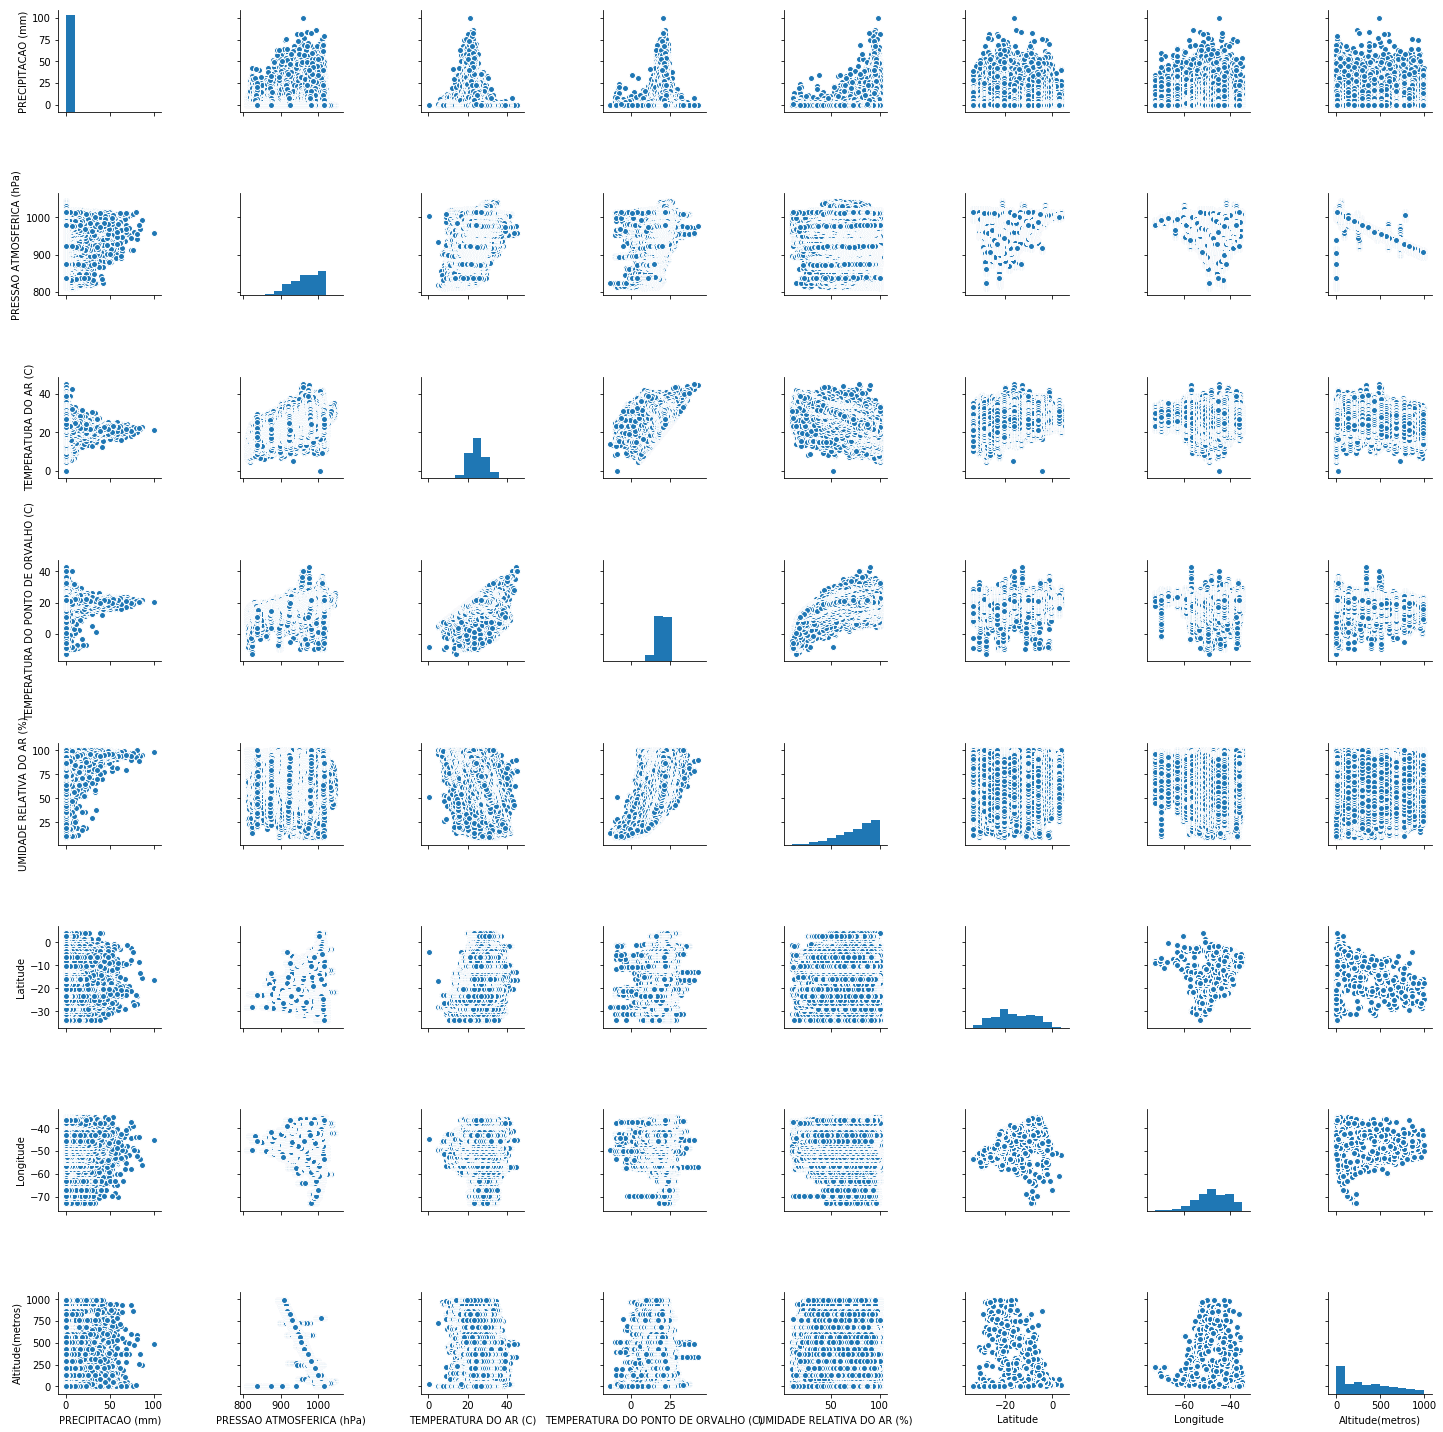

In [27]:
sns.pairplot(data[['PRECIPITACAO (mm)','PRESSAO ATMOSFERICA (hPa)','TEMPERATURA DO AR (C)','TEMPERATURA DO PONTO DE ORVALHO (C)',
                   'UMIDADE RELATIVA DO AR (%)','Latitude','Longitude','Altitude(metros)']].dropna(),)

#### Como podemos ver existe alguns dados fora do padrão dos demais registro, como os dados de Pressão atmosferica que podemos perceber que sua relação com Altidude não esta muito correta. iremos retirar este dados também

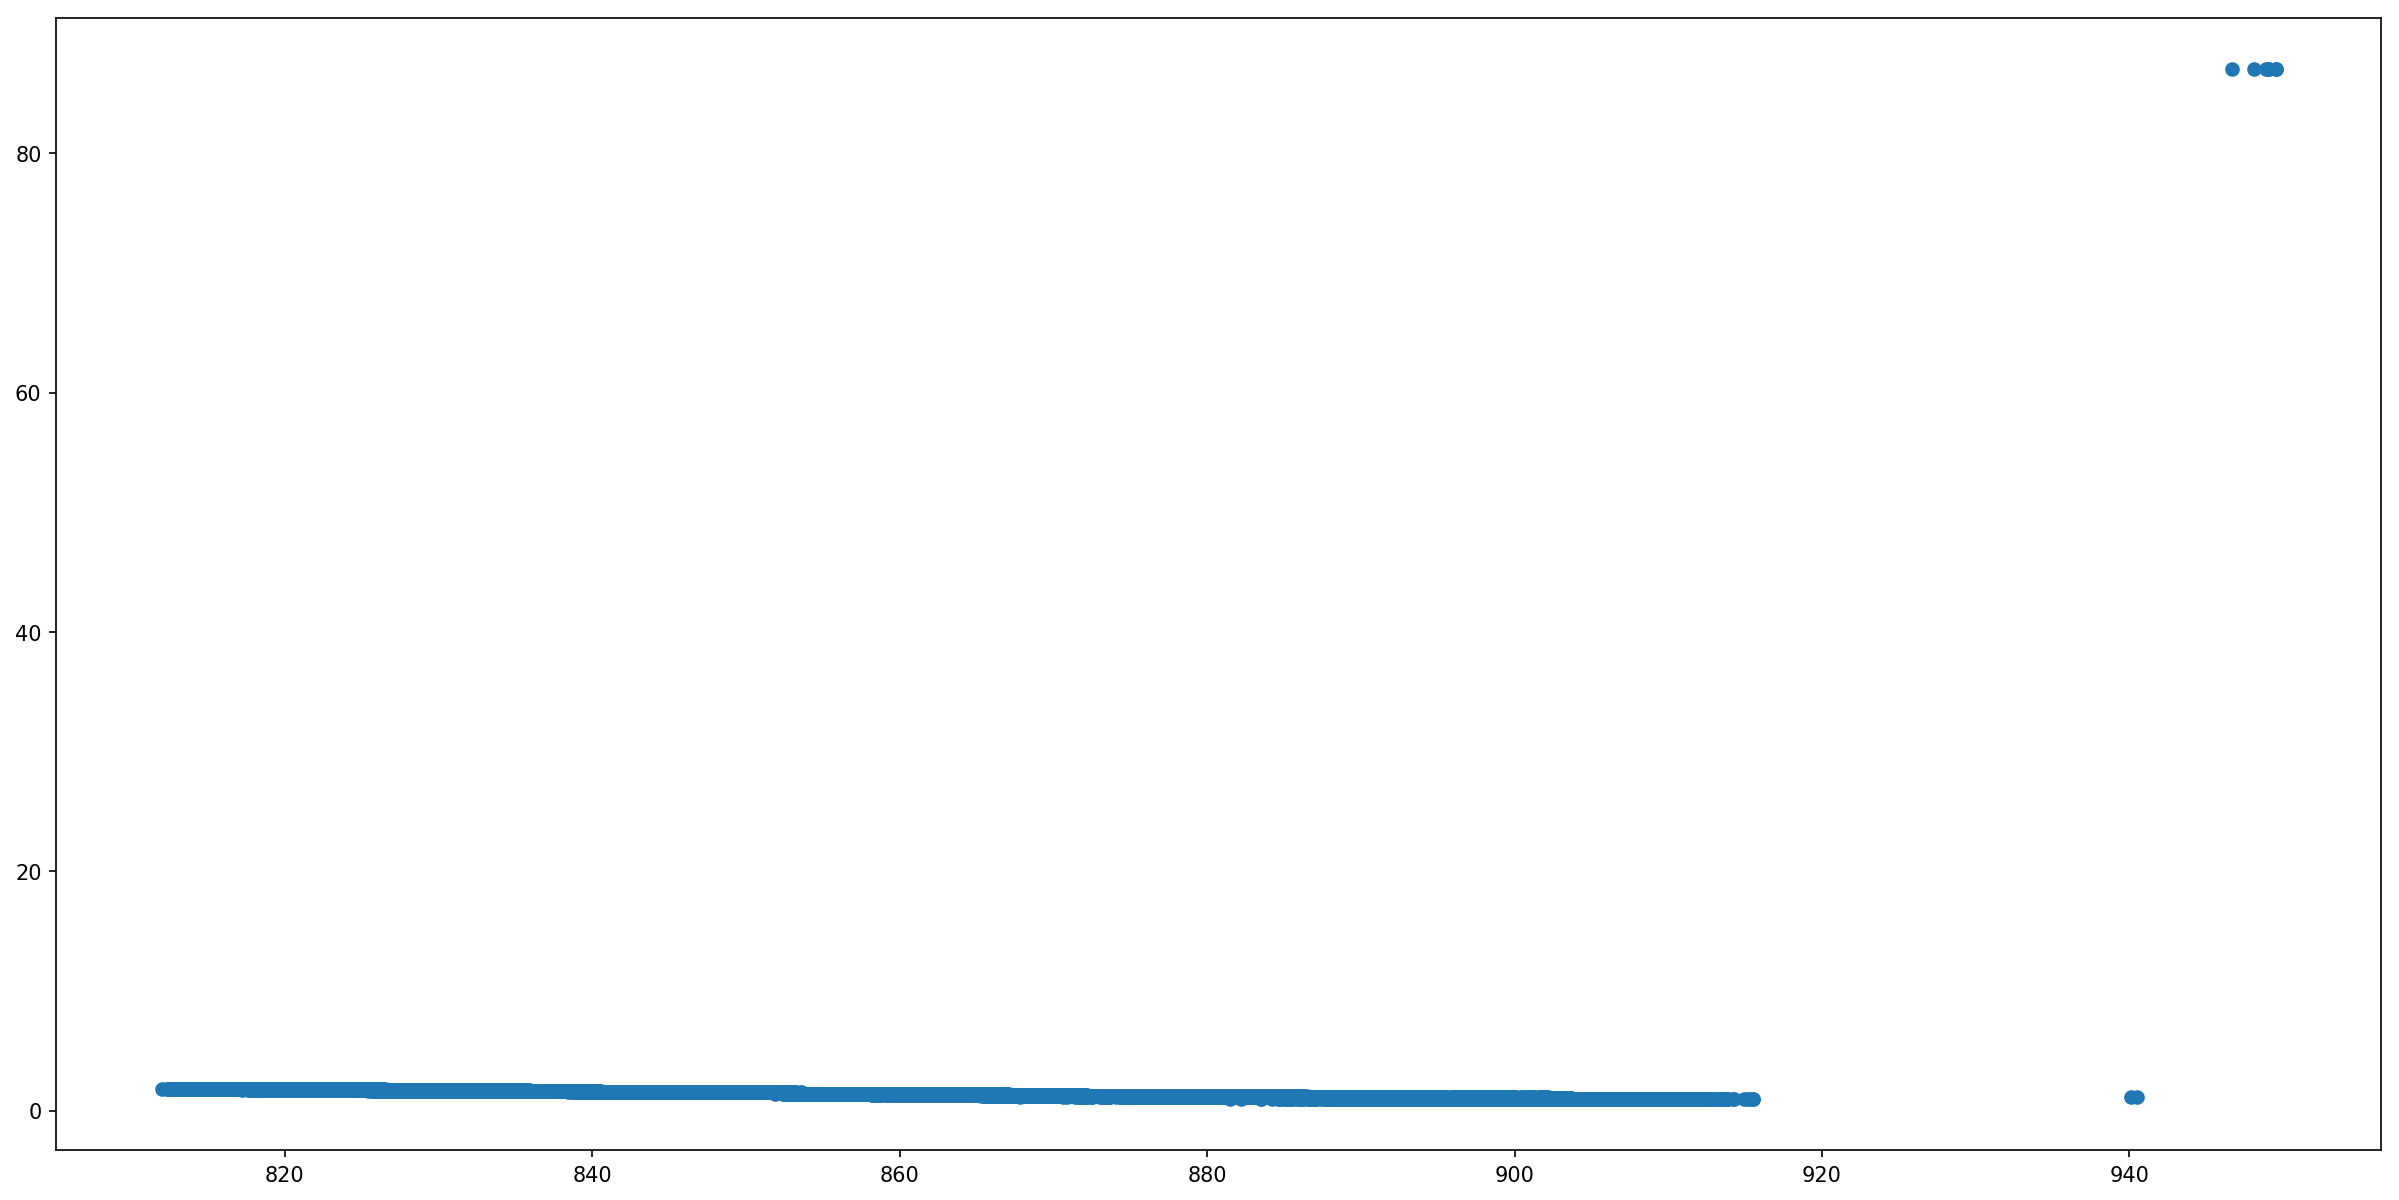

In [28]:
plt.figure(figsize=(20, 10), dpi=150)
plt.scatter(data.loc[(data['Altitude(metros)']>0) & (data['Altitude(metros)']<100)&(data['PRESSAO ATMOSFERICA (hPa)']<950),:]['PRESSAO ATMOSFERICA (hPa)'],
           data.loc[(data['Altitude(metros)']>0) & (data['Altitude(metros)']<100)&(data['PRESSAO ATMOSFERICA (hPa)']<950),:]['Altitude(metros)'])


In [29]:
data.loc[(data['Altitude(metros)']>0) & (data['Altitude(metros)']<100)&(data['PRESSAO ATMOSFERICA (hPa)']<950),:].head(10)

Altitude(metros)  Codigo OMM  Day  H(UTC)   Latitude  Longitude  \
311035            87.000     81932.0    1      19  -8.793662 -63.845931   
311036            87.000     81932.0    1      20  -8.793662 -63.845931   
311058            87.000     81932.0    2      18  -8.793662 -63.845931   
311059            87.000     81932.0    2      19  -8.793662 -63.845931   
311081            87.000     81932.0    3      17  -8.793662 -63.845931   
311085            87.000     81932.0    3      21  -8.793662 -63.845931   
311372            87.000     81932.0   15      20  -8.793662 -63.845931   
408840             1.161     86715.0    1       0 -15.789343 -47.925756   
408841             1.161     86715.0    1       1 -15.789343 -47.925756   
408842             1.161     86715.0    1       2 -15.789343 -47.925756   

        Month              Nome  PRECIPITACAO (mm)  PRESSAO ATMOSFERICA (hPa)  \
311035      1  Porto Velho-A925                0.0                      949.1   
311036      1  Porto Velho-A925                0.0                      948.1   
311058      1  Porto Velho-A925                0.0                      948.9   
311059      1  Porto Velho-A925                0.0                      946.7   
311081      1  Porto Velho-A925                0.0                      949.5   
311085      1  Porto Velho-A925                0.0                      949.5   
311372      1  Porto Velho-A925                0.0                      949.0   
408840      1     Brasília-A001                0.8                      886.0   
408841      1     Brasília-A001                3.4                      886.1   
408842      1     Brasília-A001                1.4                      886.2   

        PRESSAO ATMOSFÉRICA MAXIMA (hPa)  PRESSAO ATMOSFÉRICA MINIMA (hPa)  \
311035                             950.7                             949.1   
311036                             949.1                             947.9   
311058                             952.9                             948.9   
311059                             948.9                             946.7   
311081                             951.2                             949.5   
311085                             961.5                             949.5   
311372                             951.0                             948.8   
408840                             886.0                             885.7   
408841                             886.1                             886.0   
408842                             886.4                             886.1   

        RADIACAO GLOBAL (KJ/M2)  TEMPERATURA DO AR (C)  \
311035                 2114.792                   31.6   
311036                 2159.269                   32.1   
311058                 2631.426                   31.9   
311059                 2302.506                   32.7   
311081                 3043.420                   32.3   
311085                  978.958                   28.3   
311372                 3012.930                   30.5   
408840                      NaN                   20.1   
408841                      NaN                   19.8   
408842                      NaN                   19.9   

        TEMPERATURA DO PONTO DE ORVALHO (C)  TEMPERATURA MAXIMA (C)  \
311035                                 22.7                    32.6   
311036                                 21.5                    32.9   
311058                                 23.7                    33.4   
311059                                 20.6                    34.3   
311081                                 23.2                    32.6   
311085                                 23.7                    29.2   
311372                                 23.2                    31.0   
408840                                 19.0                    20.7   
408841                                 19.0                    20.0   
408842                                 19.1                    20.0   

        TE

In [30]:
errors = data.loc[(data['Altitude(metros)']>0) & (data['Altitude(metros)']<100)&(data['PRESSAO ATMOSFERICA (hPa)']<950),:].index.tolist()
print('Numero de resgitros que serão retirados: {}'.format(len(errors)))
for er in errors:
        data.loc[er,'PRESSAO ATMOSFERICA (hPa)'] = np.nan

Numero de resgitros que serão retirados: 173743


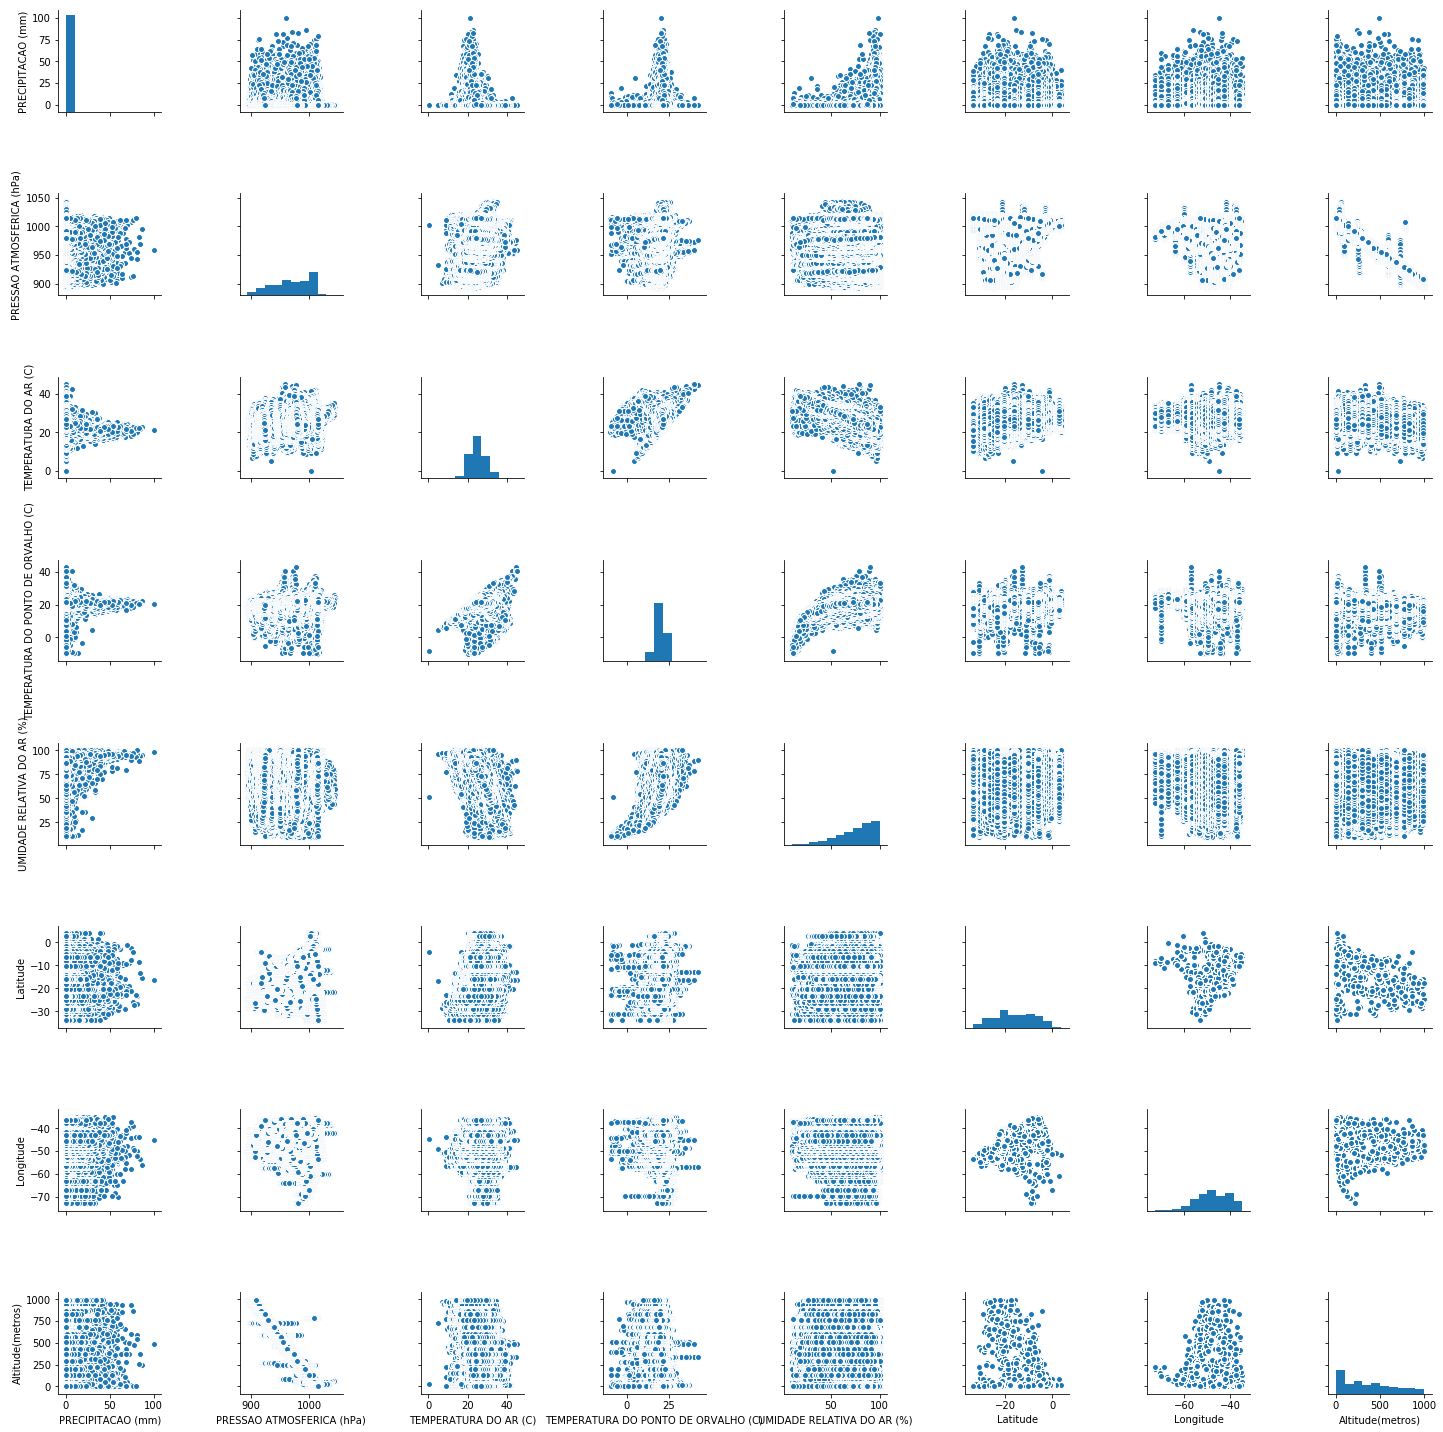

In [76]:
sns.pairplot(data[['PRECIPITACAO (mm)','PRESSAO ATMOSFERICA (hPa)','TEMPERATURA DO AR (C)','TEMPERATURA DO PONTO DE ORVALHO (C)',
                   'UMIDADE RELATIVA DO AR (%)','Latitude','Longitude','Altitude(metros)']].dropna(),)

In [31]:
(data.isnull().sum()/len(data))*100

Altitude(metros)                               0.000000
Codigo OMM                                     0.045924
Day                                            0.000000
H(UTC)                                         0.000000
Latitude                                       0.000000
Longitude                                      0.000000
Month                                          0.000000
Nome                                           0.000000
PRECIPITACAO (mm)                             11.448781
PRESSAO ATMOSFERICA (hPa)                     14.646201
PRESSAO ATMOSFÉRICA MAXIMA (hPa)               9.334801
PRESSAO ATMOSFÉRICA MINIMA (hPa)               9.334801
RADIACAO GLOBAL (KJ/M2)                       50.508156
TEMPERATURA DO AR (C)                          8.871056
TEMPERATURA DO PONTO DE ORVALHO (C)            9.900455
TEMPERATURA MAXIMA (C)                         8.877383
TEMPERATURA MINIMA (C)                         8.872198
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)     9

In [33]:
data.to_csv('./Tempo-Clima/Dados/Brasil_1_data_nan_clean_v2.csv')

## Retirando os dados ausentes

### por trabalhamos com medias não iremos fazer recuperação dos dados ausentes apenas discarta-los.
### mas primeiro iremos descarta o atribulto de radiação global, que ja ele esta ausente em 50% da base

In [34]:
data.drop(columns=['RADIACAO GLOBAL (KJ/M2)','VENTO VELOCIDADE ','VENTO, DIRECAO (graus)','VENTO, RAJADA MAXIMA (m/s)'],inplace=True)

In [35]:
data.dropna(inplace=True)

In [80]:
data.to_csv('./Tempo-Clima/Dados/Brasil_1_data_clean_v2.csv')


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skt
data = pd.read_csv('./Tempo-Clima/Dados/Brasil_1_data_clean_v2.csv').drop(columns=['Unnamed: 0'])
data.head(5)

Altitude(metros)  Codigo OMM  Day  H(UTC)  Latitude  Longitude  Month  \
0             185.0     81963.0    1       0 -9.358353 -69.926257      1   
1             185.0     81963.0    1      13 -9.358353 -69.926257      1   
2             185.0     81963.0    1      14 -9.358353 -69.926257      1   
3             185.0     81963.0    1      15 -9.358353 -69.926257      1   
4             185.0     81963.0    1      16 -9.358353 -69.926257      1   

                             Nome  PRECIPITACAO (mm)  \
0  Parque Estadual Chandless-A102                0.0   
1  Parque Estadual Chandless-A102                0.2   
2  Parque Estadual Chandless-A102                0.0   
3  Parque Estadual Chandless-A102                0.0   
4  Parque Estadual Chandless-A102                0.0   

   PRESSAO ATMOSFERICA (hPa)   ...    TEMPERATURA MINIMA (C)  \
0                      987.5   ...                      22.3   
1                      991.5   ...                      22.3   
2                      991.6   ...                      23.2   
3                      991.5   ...                      24.5   
4                      990.9   ...                      26.1   

   TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  \
0                                        21.9   
1                                        22.2   
2                                        22.8   
3                                        24.0   
4                                        24.4   

   TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  UMIDADE RELATIVA DO AR (%)  \
0                                        21.5                        96.0   
1                                        21.6                        93.0   
2                                        21.8                        89.0   
3                                        22.5                        85.0   
4                                        22.8                        83.0   

   UMIDADE RELATIVA DO MAXIMA AR (%)  UMIDADE RELATIVA DO MINIMA AR (%)  Year  \
0                               96.0                               95.0  2009   
1                               96.0                               93.0  2009   
2                               93.0                               89.0  2009   
3                               91.0                               85.0  2009   
4                               85.0                               77.0  2009   

                      Cidade  Estado  Regiao  
0  Parque Estadual Chandless    Acre   Norte  
1  Parque Estadual Chandless    Acre   Norte  
2  Parque Estadual Chandless    Acre   Norte  
3  Parque Estadual Chandless    Acre   Norte  
4  Parque Estadual Chandless    Acre   Norte  

[5 rows x 25 columns]

In [81]:
data.describe().T

count          mean  \
Altitude(metros)                            2642977.0    372.270175   
Codigo OMM                                  2642977.0  85332.063290   
Day                                         2642977.0     15.937074   
H(UTC)                                      2642977.0     11.583174   
Latitude                                    2642977.0    -15.791262   
Longitude                                   2642977.0    -47.639106   
Month                                       2642977.0      1.000000   
PRECIPITACAO (mm)                           2642977.0      0.245339   
PRESSAO ATMOSFERICA (hPa)                   2642977.0    969.787947   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)            2642977.0    970.073478   
PRESSAO ATMOSFÉRICA MINIMA (hPa)            2642977.0    969.507003   
TEMPERATURA DO AR (C)                       2642977.0     25.109292   
TEMPERATURA DO PONTO DE ORVALHO (C)         2642977.0     19.913162   
TEMPERATURA MAXIMA (C)                      2642977.0     25.735432   
TEMPERATURA MINIMA (C)                      2642977.0     24.520456   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  2642977.0     20.460440   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  2642977.0     19.393616   
UMIDADE RELATIVA DO AR (%)                  2642977.0     75.530103   
UMIDADE RELATIVA DO MAXIMA AR (%)           2642977.0     78.382117   
UMIDADE RELATIVA DO MINIMA AR (%)           2642977.0     72.564156   
Year                                        2642977.0   2011.738741   

                                                    std           min  \
Altitude(metros)                             285.967632      2.000000   
Codigo OMM                                  2270.696005  81609.000000   
Day                                            8.950369      1.000000   
H(UTC)                                         6.928038      0.000000   
Latitude                                       8.248399    -33.742297   
Longitude                                      6.943784    -72.786778   
Month                                          0.000000      1.000000   
PRECIPITACAO (mm)                              1.662200      0.000000   
PRESSAO ATMOSFERICA (hPa)                     31.546642    893.500000   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              31.552599    893.700000   
PRESSAO ATMOSFÉRICA MINIMA (hPa)              31.540692    886.600000   
TEMPERATURA DO AR (C)                          3.919506      7.000000   
TEMPERATURA DO PONTO DE ORVALHO (C)            2.785216     -6.400000   
TEMPERATURA MAXIMA (C)                         4.108404      7.800000   
TEMPERATURA MINIMA (C)                         3.722049      5.400000   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)     2.703935     -3.600000   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)     2.892973     -9.800000   
UMIDADE RELATIVA DO AR (%)                    17.404549     10.000000   
UMIDADE RELATIVA DO MAXIMA AR (%)             16.258703     11.000000   
UMIDADE RELATIVA DO MINIMA AR (%)             18.334197     10.000000   
Year                                           3.019430   2001.000000   

                                                     25%           50%  \
Altitude(metros)                              104.000000    338.000000   
Codigo OMM                                  81970.000000  86728.000000   
Day                                             8.000000     16.000000   
H(UTC)                                          6.000000     12.000000   
Latitude                                      -22.358052    -16.088049   
Longitude                                     -52.471294    -48.164817   
Month                                           1.000000      1.000000   
PRECIPITACAO (mm)                               0.000000      0.000000   
PRESSAO ATMOSFERICA (hPa)                     946.600000    972.900000   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              946.900000    973.200000   
PRESSAO ATMOSFÉRICA MINIMA (hPa)              946.400000    972.

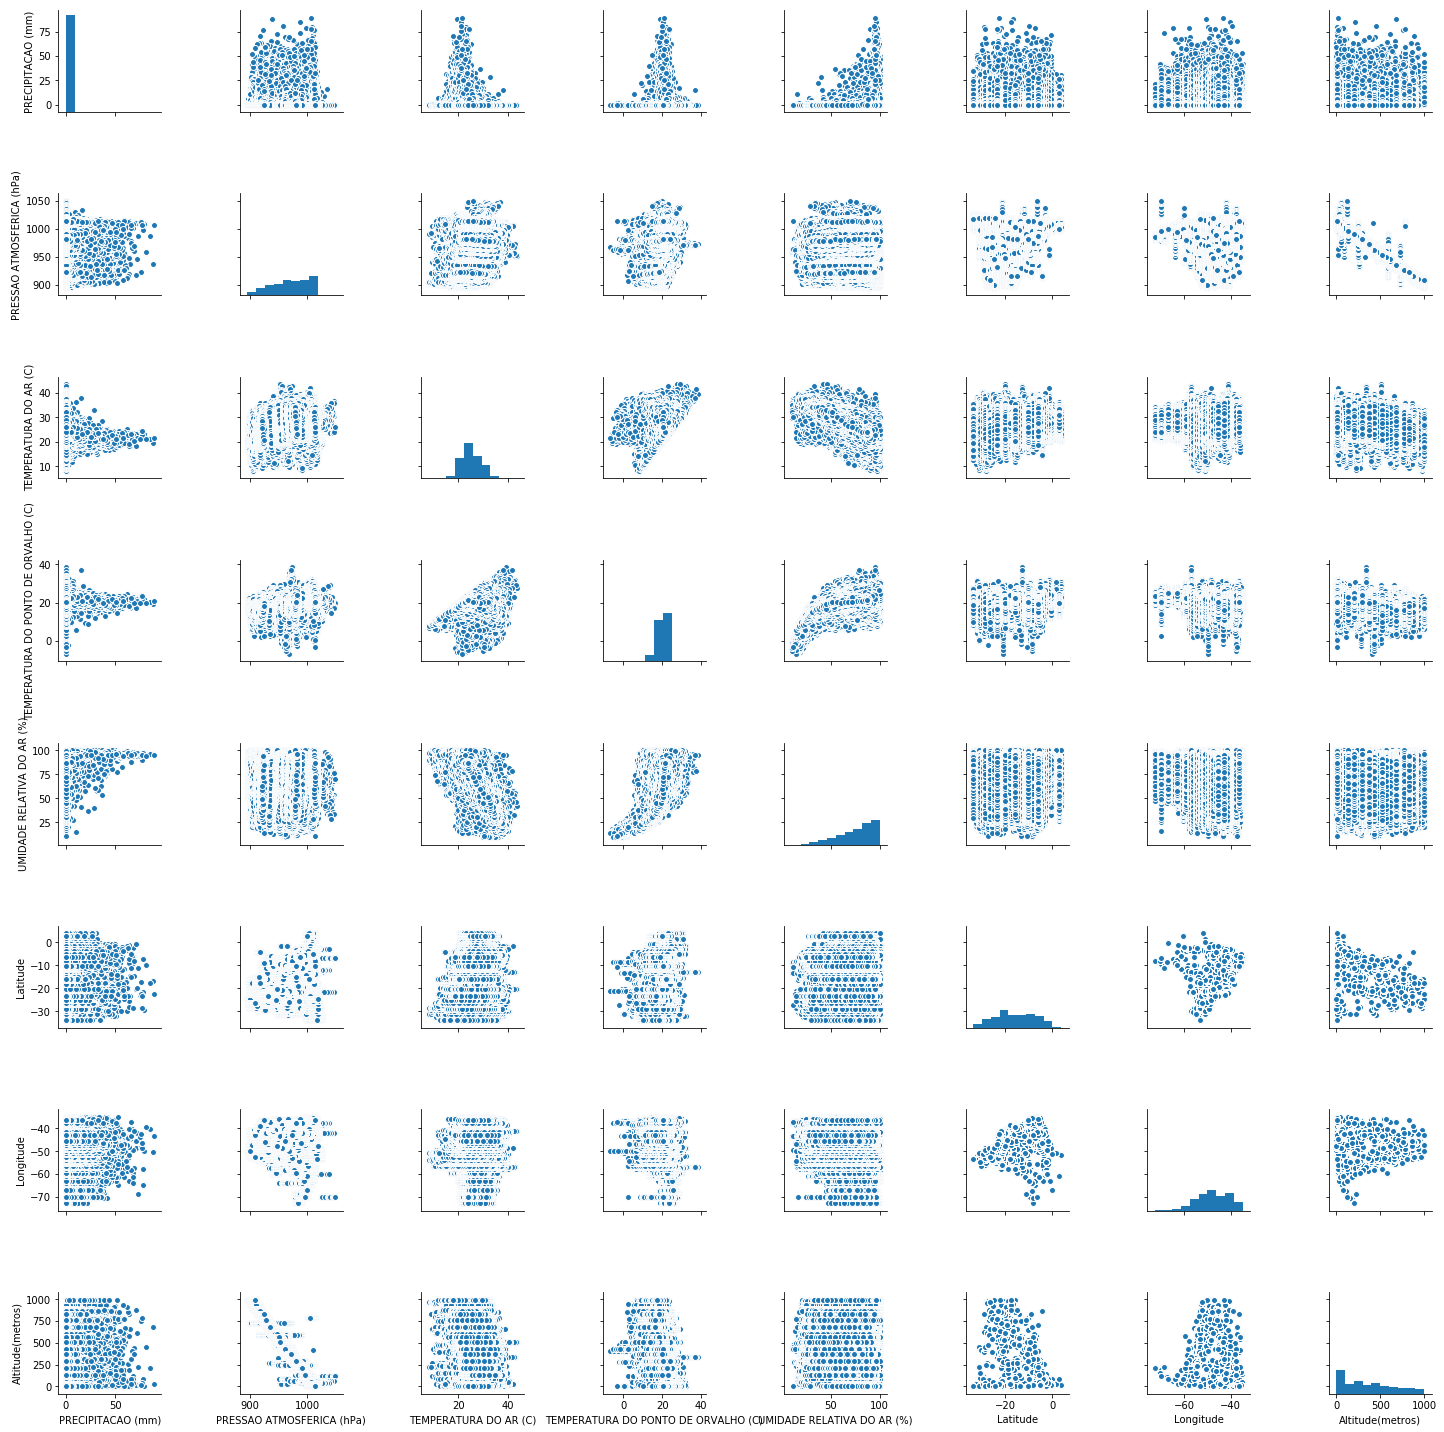

In [3]:
sns.pairplot(data[['PRECIPITACAO (mm)','PRESSAO ATMOSFERICA (hPa)','TEMPERATURA DO AR (C)',
                  'TEMPERATURA DO PONTO DE ORVALHO (C)','UMIDADE RELATIVA DO AR (%)','Latitude',
                  'Longitude','Altitude(metros)']])

### Fazendo a base de dados com as medias mensais de cada estação

In [2]:
data_mean = data.groupby(['Nome']).agg('mean')
data_mean.to_csv('./Tempo-Clima/Dados/Brasil_1_mean.csv')
data_mean.head(5)

Altitude(metros)  Codigo OMM        Day     H(UTC)  \
Nome                                                                      
Abrolhos-A422                    21.0     86765.0  15.830526  11.495661   
Acaraú-A360                      67.0     81755.0  16.006924  11.500096   
Afonso Cláudio-A657             507.0     86827.0  16.051689  11.511824   
Aimorés-A534                    288.0     86803.0  16.000000  11.496721   
Alegre-A617                     129.0     86828.0  15.999597  11.498386   

                      Latitude  Longitude  Month  PRECIPITACAO (mm)  \
Nome                                                                  
Abrolhos-A422       -17.963016 -38.703288    1.0           0.070138   
Acaraú-A360          -3.121067 -40.087288    1.0           0.111637   
Afonso Cláudio-A657 -20.104194 -41.106861    1.0           0.162365   
Aimorés-A534        -19.532768 -41.090801    1.0           0.127123   
Alegre-A617         -20.750412 -41.488852    1.0           0.205702   

                     PRESSAO ATMOSFERICA (hPa)  \
Nome                                             
Abrolhos-A422                      1011.605598   
Acaraú-A360                        1003.576842   
Afonso Cláudio-A657                 956.023784   
Aimorés-A534                        986.701328   
Alegre-A617                         997.316985   

                     PRESSAO ATMOSFÉRICA MAXIMA (hPa)     ...       \
Nome                                                      ...        
Abrolhos-A422                             1011.828824     ...        
Acaraú-A360                               1003.836757     ...        
Afonso Cláudio-A657                        956.261486     ...        
Aimorés-A534                               986.956096     ...        
Alegre-A617                                997.572539     ...        

                     TEMPERATURA DO AR (C)  \
Nome                                         
Abrolhos-A422                    26.403641   
Acaraú-A360                      26.902770   
Afonso Cláudio-A657              26.331926   
Aimorés-A534                     26.036741   
Alegre-A617                      26.621503   

                     TEMPERATURA DO PONTO DE ORVALHO (C)  \
Nome                                                       
Abrolhos-A422                                  22.634848   
Acaraú-A360                                    21.882439   
Afonso Cláudio-A657                            19.643243   
Aimorés-A534                                   19.837078   
Alegre-A617                                    19.954801   

                     TEMPERATURA MAXIMA (C)  TEMPERATURA MINIMA (C)  \
Nome                                                                  
Abrolhos-A422                     26.733640               26.089740   
Acaraú-A360                       27.500192               26.359761   
Afonso Cláudio-A657               27.285000               25.407601   
Aimorés-A534                      26.699126               25.419960   
Alegre-A617                       27.331240               25.962668   

                     TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  \
Nome                                                              
Abrolhos-A422                                         22.988191   
Acaraú-A360                                           22.298230   
Afonso Cláudio-A657                                   20.437095   
Aimorés-A534                                          20.441180   
Alegre-A617                                           20.578658   

                     TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  \
Nome                                                              
Abrolhos-A422                                         22.283699   
Acaraú-A360                                           21.470994   
Afonso Cláudio-A657                                   18.844662   
Aimorés-A534                                          19.258113   
Alegre-A617                              

In [3]:
data_mean['Precipitação Acum.(mm)'] = data.groupby(['Nome','Year']).agg('sum').groupby('Nome').agg('mean')['PRECIPITACAO (mm)']

data_mean.to_csv('./Tempo-Clima/Dados/Brasil_1_mean.csv')

In [4]:
data_mean.describe().T

count          mean          std  \
Altitude(metros)                            458.0    365.521834   282.831588   
Codigo OMM                                  458.0  85201.056769  2325.371846   
Day                                         458.0     15.927174     0.283932   
H(UTC)                                      458.0     11.587590     0.172818   
Latitude                                    458.0    -15.371909     8.276341   
Longitude                                   458.0    -48.015097     7.263208   
Month                                       458.0      1.000000     0.000000   
PRECIPITACAO (mm)                           458.0      0.248918     0.118368   
PRESSAO ATMOSFERICA (hPa)                   458.0    970.463632    31.018293   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)            458.0    970.749562    31.026400   
PRESSAO ATMOSFÉRICA MINIMA (hPa)            458.0    970.182033    31.011770   
TEMPERATURA DO AR (C)                       458.0     25.166107     1.786796   
TEMPERATURA DO PONTO DE ORVALHO (C)         458.0     20.009061     1.893327   
TEMPERATURA MAXIMA (C)                      458.0     25.790517     1.775655   
TEMPERATURA MINIMA (C)                      458.0     24.578979     1.801156   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  458.0     20.556930     1.848208   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  458.0     19.489344     1.940896   
UMIDADE RELATIVA DO AR (%)                  458.0     75.702368     6.989880   
UMIDADE RELATIVA DO MAXIMA AR (%)           458.0     78.554017     6.832995   
UMIDADE RELATIVA DO MINIMA AR (%)           458.0     72.736567     7.117130   
Year                                        458.0   2012.058623     1.237797   
Precipitação Acum.(mm)                      458.0    175.970698    89.733540   

                                                     min           25%  \
Altitude(metros)                                2.000000    108.250000   
Codigo OMM                                  81609.000000  81950.250000   
Day                                            12.296099     15.858514   
H(UTC)                                         11.338053     11.497550   
Latitude                                      -33.742297    -21.949157   
Longitude                                     -72.786778    -52.955566   
Month                                           1.000000      1.000000   
PRECIPITACAO (mm)                               0.014519      0.161988   
PRESSAO ATMOSFERICA (hPa)                     902.892063    949.023218   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              903.143750    949.286285   
PRESSAO ATMOSFÉRICA MINIMA (hPa)              902.640961    948.758473   
TEMPERATURA DO AR (C)                          19.854811     24.112123   
TEMPERATURA DO PONTO DE ORVALHO (C)            15.718951     18.488906   
TEMPERATURA MAXIMA (C)                         20.548823     24.719783   
TEMPERATURA MINIMA (C)                         19.184433     23.467741   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)     16.350589     19.082854   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)     15.129963     17.931352   
UMIDADE RELATIVA DO AR (%)                     52.336253     72.550838   
UMIDADE RELATIVA DO MAXIMA AR (%)              54.664477     75.355683   
UMIDADE RELATIVA DO MINIMA AR (%)              49.652330     69.357191   
Year                                         2008.524291   2011.500500   
Precipitação Acum.(mm)                          9.933333    109.016964   

                                                     50%           75%  \
Altitude(metros)                              318.500000    557.250000   
Codigo OMM                                  86710.000000  86854.750000   
Day                                            15.997478     16.003929   
H(UTC)                                         11.509815     11.619378   
Latitude                                      -15.290187     -8.505388   
Longitude                                     -48.228444

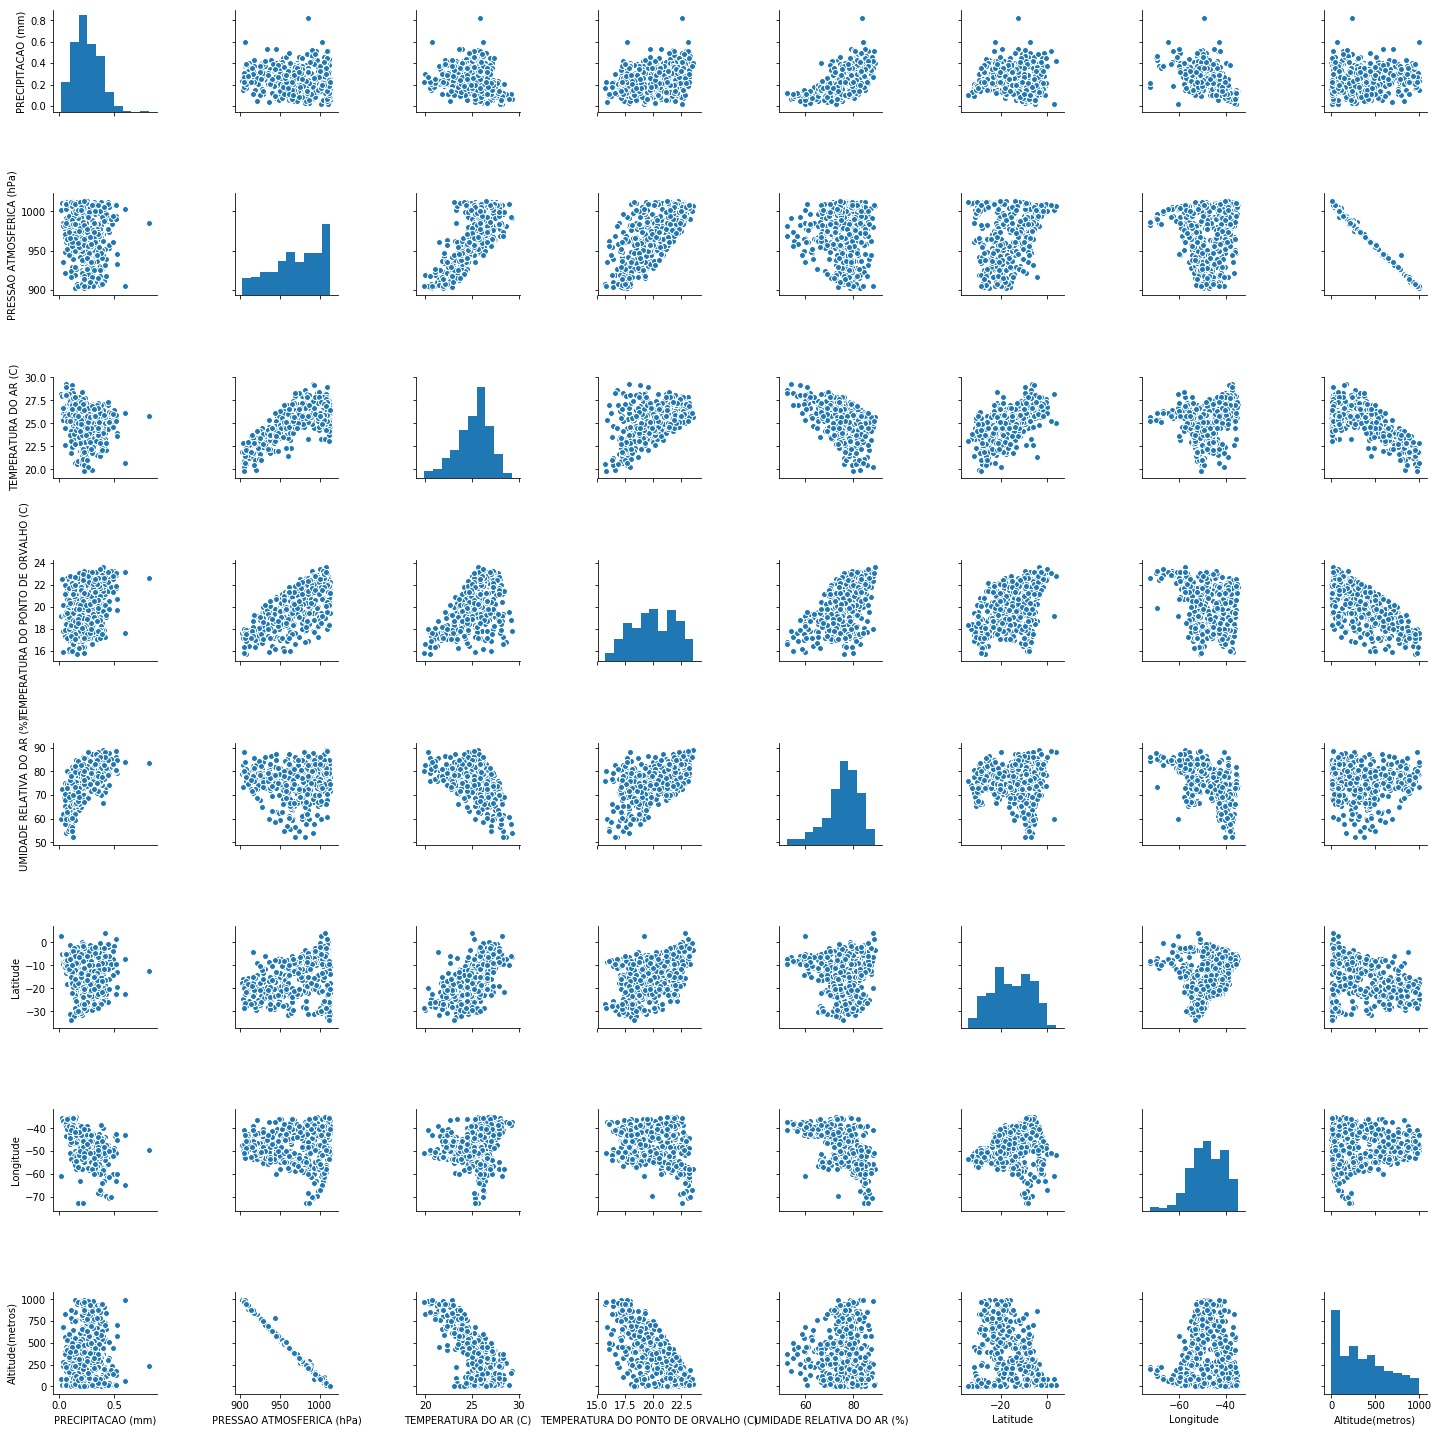

In [85]:
sns.pairplot(data_mean[['PRECIPITACAO (mm)','PRESSAO ATMOSFERICA (hPa)','TEMPERATURA DO AR (C)',
                  'TEMPERATURA DO PONTO DE ORVALHO (C)','UMIDADE RELATIVA DO AR (%)','Latitude',
                  'Longitude','Altitude(metros)']])

In [86]:
target_wanderlay = ['UMIDADE RELATIVA DO AR (%)']
features_UR_wanderlay = data_mean.columns.tolist()
features_UR_wanderlay.remove('Day')
features_UR_wanderlay.remove('Month')
features_UR_wanderlay.remove('Codigo OMM')
features_UR_wanderlay.remove('Year')
features_UR_wanderlay.remove('H(UTC)')
#features_UR_wanderlay.remove('VENTO VELOCIDADE ')
#features_UR_wanderlay.remove('VENTO, DIRECAO (graus)')
#features_UR_wanderlay.remove('VENTO, RAJADA MAXIMA (m/s)')
features_UR_wanderlay.remove('UMIDADE RELATIVA DO AR (%)')
features_UR_wanderlay.remove('UMIDADE RELATIVA DO MINIMA AR (%)')
features_UR_wanderlay.remove('UMIDADE RELATIVA DO MAXIMA AR (%)')
features_UR_wanderlay.remove('TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)')
features_UR_wanderlay.remove('TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)')
features_UR_wanderlay.remove('TEMPERATURA DO PONTO DE ORVALHO (C)')
features_UR_wanderlay.remove('TEMPERATURA DO AR (C)')
#features_UR_wanderlay.remove('TEMPERATURA MAXIMA (C)')
#features_UR_wanderlay.remove('TEMPERATURA MINIMA (C)')
features_UR_wanderlay.remove('PRECIPITACAO (mm)')
features_UR_wanderlay.remove('PRESSAO ATMOSFERICA (hPa)')
features_UR_wanderlay.remove('PRESSAO ATMOSFÉRICA MAXIMA (hPa)')
features_UR_wanderlay.remove('PRESSAO ATMOSFÉRICA MINIMA (hPa)')




features_UR_wanderlay

['Altitude(metros)',
 'Latitude',
 'Longitude',
 'TEMPERATURA MAXIMA (C)',
 'TEMPERATURA MINIMA (C)']

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_mean[features_UR_wanderlay], data_mean[target_wanderlay],test_size=.25)

In [88]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler(feature_range=(-0.8,0.8))
scaler_y = MinMaxScaler(feature_range=(-0.8,0.8))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

In [92]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features_UR_wanderlay)+1), activation='logistic', solver='adam', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)


In [93]:
import sklearn.metrics as metrics
print('Variance: {}'.format(metrics.explained_variance_score(scaler_y.inverse_transform(y_test).ravel(),scaler_y.inverse_transform([y_pred,]).ravel())))
print('Erro absoluto medio: {}'.format(metrics.mean_absolute_error(scaler_y.inverse_transform(y_test).ravel(),scaler_y.inverse_transform([y_pred,]).ravel())))
print('Erro quadrado medio: {}'.format(metrics.mean_squared_error(scaler_y.inverse_transform(y_test).ravel(),scaler_y.inverse_transform([y_pred,]).ravel())))
print('Erro absoluto mediano: {}'.format(metrics.median_absolute_error(scaler_y.inverse_transform(y_test).ravel(),scaler_y.inverse_transform([y_pred,]).ravel())))
print('R2 Score: {}'.format(metrics.r2_score(scaler_y.inverse_transform(y_test).ravel(),scaler_y.inverse_transform([y_pred,]).ravel())))

Variance: 0.8512049207874164
Erro absoluto medio: 2.0673445746620054
Erro quadrado medio: 6.366416512560287
Erro absoluto mediano: 1.752770501680203
R2 Score: 0.845191635656429


In [94]:
errors=abs(scaler_y.inverse_transform(y_test).ravel()-scaler_y.inverse_transform([y_pred,]))
print('Error(UR_true - UR_pred)')
print('MIN: {} \tMAX: {} \tMEAN: {}\tStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Error(UR_true - UR_pred)
MIN: 0.09175741388577308 	MAX: 6.254493155829223 	MEAN: 2.0673445746620054	Std: 1.4465486242003274


In [99]:
df_rest = pd.DataFrame(data = scaler_y.inverse_transform(y_test).ravel(),columns=['Y_true'])
df_rest['Y_pred'] = scaler_y.inverse_transform(y_test).ravel()
df_rest.sort_values(['Y_pred','Y_true']).head(5)

Y_true     Y_pred
20  52.405233  52.405233
38  54.998961  54.998961
31  59.713085  59.713085
18  60.070148  60.070148
90  61.813641  61.813641

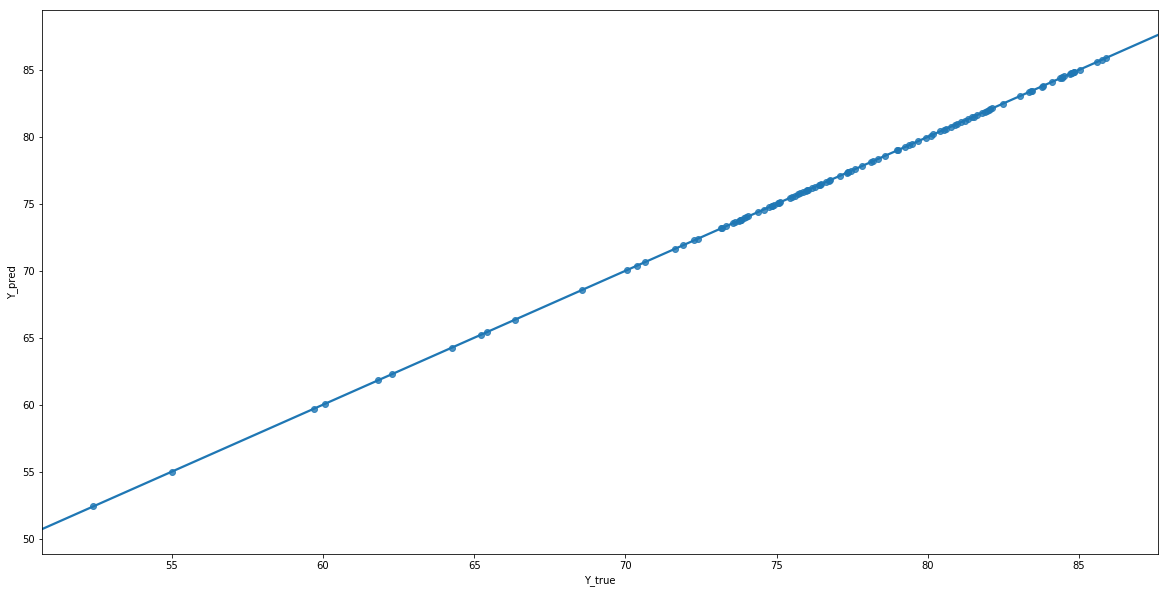

In [96]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(x="Y_true", y="Y_pred", data=df_rest,ax=ax)

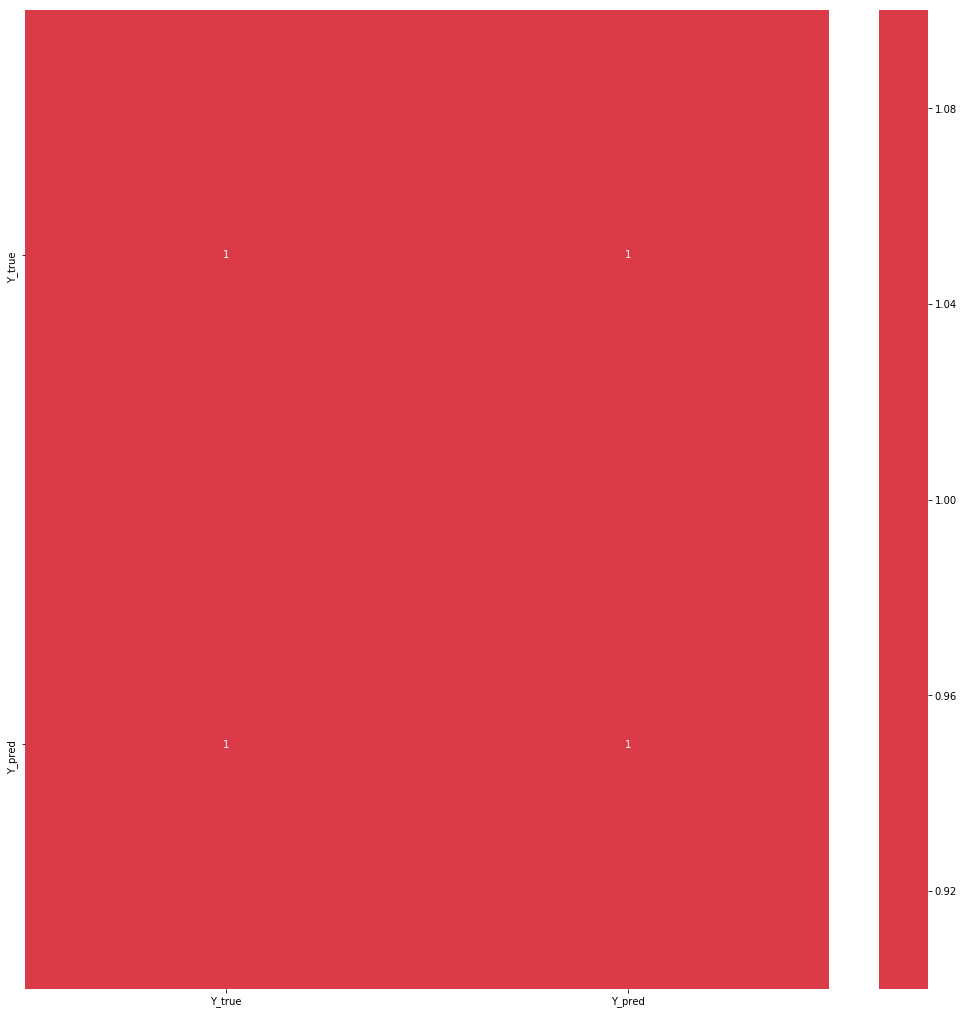

In [97]:
cor_matrix = df_rest.corr().round(2)
# Plotting heatmap 
fig = plt.figure(figsize=(18,18));
sns.heatmap(cor_matrix, annot=True, center=0, cmap = sns.diverging_palette(250, 10, as_cmap=True), ax=plt.subplot(111));
plt.show()